#### Student Alcohol Consumption
## EXPLORATORY DATA ANALYSIS

# Business Problem

Alcohol abuse among teenage students is a national problem, according to the [CDC](https://www.cdc.gov/alcohol/fact-sheets/underage-drinking.htm). The teenage brain is not biologically fully developed. One of the dangerous effects of youth alcohol abuse is the risk of inhibiting proper brain development. According to Dr. Marisa M. Silveri, director of [McLean Hospital’s Neurodevelopmental Laboratory on Addictions and Mental Health](https://www.mcleanhospital.org/news/essence-adolescence-examining-addiction-teenage-brain), "age of first alcohol use is a strong predictor of an alcohol abuse problem later in life. If you’re 13 when you start drinking, you have a 47% chance of having a problem as an adult. If you wait until 21, you still have a 9% chance that you’ll have a problem later on, but there’s a clear pattern—the longer you can delay onset of use, the more you can protect your brain." Other negative effects of adolescent alcohol abuse is memory difficulties. 

We say that the children and youth are the pillars of the future. So, to be able to protect and prevent young students from becoming heavy alcohol drinkers becomes very important. One of the way to do this, is to first identify what factors or condition in a student or teenager's life makes them take decisions that lead them to become heavy drinkers.

# Data Understanding

The data for this data science project in researching factors influencing teenage alcoholism was sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/student%2Bperformance#). It was donated to the site by Prof. Paulo Cortez of University Minho. His original work on the dataset, "USING DATA MINING TO PREDICT SECONDARY SCHOOL STUDENT PERFORMANCE, can be found [here](http://www3.dsi.uminho.pt/pcortez/student.pdf)

The data set consists of information on various attributes for each student, taking Portuguese language classes who come from ether of the two higher secondary schools, The Gabriel Pereira School and  the Mousinho da Silveira School. There is information on 649 students on 33 attributes. A list of all the features with description can be found on [Readme](https://github.com/Yeshi341/Student_Alcohol_Consumption/blob/master/Readme.md) section of the Github page to this project. The features have also been described below as [EDA]('EDA.ipynb') is performed on each variable.

The atttributes in the data were a mix of categorical variables, continuous variables and binary variables.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv('student-por.csv')

## Data Preparation- data cleaning and transformations

In [3]:
#Rows tell you the number of obs and columns tell you the number of features
print('Rows and Columns :', df.shape,'\n' ) 

#Running info on the dataset to check on the any visible missing values and datatypes
print('INFO:')
print(df.info(), '\n')

# Checking for the number of unique values in each column in dataset
print('Unique Values :','\n', df.nunique(), '\n')

Rows and Columns : (649, 33) 

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         64

In [4]:
pd.set_option("display.max_columns", None) #show all n columns in the display
df.head() #preview of first five observation

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
# checking the various values in the Mjob variable
df['Mjob'].value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

In [6]:
# checking the various values in the Fjob variable
df['Fjob'].value_counts()

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

In [7]:
# checking the various values in the failures variable
df['failures'].value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

In [8]:
# Converting all binary non-numeric variables to numeric variables to allow for easy data processing

df.loc[df['school']=='GP', 'school'] = 1
df.loc[df['school']=='MS', 'school'] = 0

df.loc[df['sex']=='F', 'sex'] = 1
df.loc[df['sex']=='M', 'sex'] = 0

df.loc[df['address']=='R', 'address'] = 1
df.loc[df['address']=='U', 'address'] = 0

df.loc[df['famsize']=='GT3', 'famsize'] = 1
df.loc[df['famsize']=='LE3', 'famsize'] = 0

df.loc[df['Pstatus']=='T', 'Pstatus'] = 1
df.loc[df['Pstatus']=='A', 'Pstatus'] = 0

df.loc[df['schoolsup']=='yes', 'schoolsup'] = 1
df.loc[df['schoolsup']=='no', 'schoolsup'] = 0

df.loc[df['famsup']=='yes', 'famsup'] = 1
df.loc[df['famsup']=='no', 'famsup'] = 0

df.loc[df['paid']=='yes', 'paid'] = 1
df.loc[df['paid']=='no', 'paid'] = 0

df.loc[df['activities']=='yes', 'activities'] = 1
df.loc[df['activities']=='no', 'activities'] = 0

df.loc[df['nursery']=='yes', 'nursery'] = 1
df.loc[df['nursery']=='no', 'nursery'] = 0

df.loc[df['higher']=='yes', 'higher'] = 1
df.loc[df['higher']=='no', 'higher'] = 0

df.loc[df['internet']=='yes', 'internet'] = 1
df.loc[df['internet']=='no', 'internet'] = 0

df.loc[df['romantic']=='yes', 'romantic'] = 1
df.loc[df['romantic']=='no', 'romantic'] = 0


In [9]:
# checking to see if the binary conversion to numeric binary worked
df['romantic'].value_counts()

0    410
1    239
Name: romantic, dtype: int64

In [10]:
# looking at first 5 rows preview to check to see if the binary conversion to numeric binary worked
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,0,1,0,4,4,at_home,teacher,course,mother,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,1,1,17,0,1,1,1,1,at_home,other,course,father,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,1,1,15,0,0,1,1,1,at_home,other,other,mother,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,1,1,15,0,1,1,4,2,health,services,home,mother,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,1,1,16,0,1,1,3,3,other,other,home,father,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


In [11]:
#checking the various values in the reason variable
df['reason'].value_counts()

course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64

Binning all nominal variables to numeric bins

In [12]:
# Converting all nominal non-numeric variables to numeric variables to allow for easy data processing

conditions=[df['Mjob'] == 'at_home',
          df['Mjob'] == 'services',
          df['Mjob'] == 'teacher',
          df['Mjob'] == 'health',
           df['Mjob']== 'other']
choices = [1,2,3,4,5]
df['Mjob'] = np.select(conditions, choices)

conditions=[df['Fjob'] == 'at_home',
          df['Fjob'] == 'services',
          df['Fjob'] == 'teacher',
          df['Fjob'] == 'health',
           df['Fjob']== 'other']
choices = [1,2,3,4,5]
df['Fjob'] = np.select(conditions, choices)

conditions=[df['reason'] == 'home',
          df['reason'] == 'reputation',
          df['reason'] == 'course',
           df['reason']== 'other']
choices = [1,2,3,4]
df['reason'] = np.select(conditions, choices)

conditions=[df['guardian'] == 'father',
          df['guardian'] == 'mother',
          df['guardian'] == 'other']
choices = [1,2,3]
df['guardian'] = np.select(conditions, choices)


In [13]:
#Checking to ensure numeric conversion worked
df['Mjob'].value_counts()

5    258
2    136
1    135
3     72
4     48
Name: Mjob, dtype: int64

In [14]:
#checking for datadtypes. We want all numeric.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null int64
sex           649 non-null int64
age           649 non-null int64
address       649 non-null int64
famsize       649 non-null int64
Pstatus       649 non-null int64
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null int64
Fjob          649 non-null int64
reason        649 non-null int64
guardian      649 non-null int64
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null int64
famsup        649 non-null int64
paid          649 non-null int64
activities    649 non-null int64
nursery       649 non-null int64
higher        649 non-null int64
internet      649 non-null int64
romantic      649 non-null int64
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 non-null int64
Walc

In [15]:
df.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [16]:
# Combining the 'alcohol' variable 
df['week_alc']= df['Dalc']+df['Walc']

df['week_alc'].value_counts()

2     241
3     116
4      99
5      73
6      50
7      32
8      17
10     15
9       6
Name: week_alc, dtype: int64

**Explain why binning the variable above like this. Also, explain the binary alcohol variable transformation below**

0    529
1    120
Name: alc, dtype: int64
0    0.8151
1    0.1849
Name: alc, dtype: float64


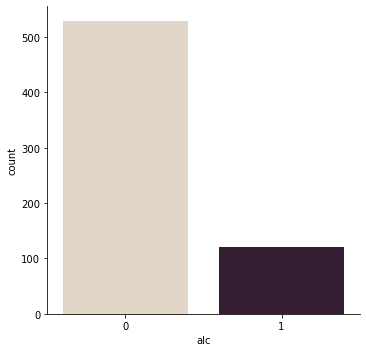

In [17]:
# defining the target variable 
df['alc'] = [0 if x <= 5 else 1 for x in df['week_alc']]
        
print(df['alc'].value_counts())
print(df['alc'].value_counts(normalize = True))

sns.catplot(x="alc", kind="count", palette="ch:.25", data=df)

In [18]:
# checking for Nan values
df.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
week_alc      False
alc           False
dtype: bool

In [19]:
# correlation with binary alcohol variable
df.corrwith(df['alc'])

school       -0.001771
sex          -0.321330
age           0.093562
address       0.056755
famsize      -0.056517
Pstatus       0.045782
Medu         -0.037659
Fedu          0.000740
Mjob         -0.027360
Fjob         -0.005202
reason        0.038054
guardian      0.036025
traveltime    0.083679
studytime    -0.185215
failures      0.109637
schoolsup    -0.046306
famsup       -0.086308
paid          0.063277
activities    0.045715
nursery      -0.073143
higher       -0.106124
internet      0.027428
romantic     -0.018030
famrel       -0.048541
freetime      0.110976
goout         0.310167
Dalc          0.767595
Walc          0.715466
health        0.108910
absences      0.146243
G1           -0.199509
G2           -0.192783
G3           -0.211130
week_alc      0.817516
alc           1.000000
dtype: float64

In [20]:
# checking correlation with continuous alcohol variable
df.corrwith(df['week_alc'])

school       -0.031029
sex          -0.338011
age           0.118226
address       0.029962
famsize      -0.080907
Pstatus       0.065023
Medu         -0.015999
Fedu          0.024811
Mjob         -0.042662
Fjob         -0.040209
reason        0.022380
guardian      0.005471
traveltime    0.079836
studytime    -0.202412
failures      0.102211
schoolsup    -0.076384
famsup       -0.050110
paid          0.047132
activities    0.031646
nursery      -0.085211
higher       -0.115475
internet      0.058970
romantic      0.015925
famrel       -0.095450
freetime      0.128528
goout         0.364339
Dalc          0.861636
Walc          0.930831
health        0.101543
absences      0.181084
G1           -0.190931
G2           -0.194222
G3           -0.208881
week_alc      1.000000
alc           0.817516
dtype: float64

**Note:** How can you use this info during the modeling phase? Can you perform any variable significance to check this, for values only upto 18 years, or also more?

In [21]:
df[df['age'] >=19]['age'].count()

41

### Var 1: school
**The school that the student goes to Gabriel Pereira or 'MS' or Mousinho da Silveira**

Descriptive Statistics : 
 count    649.000000
mean       0.651772
std        0.476776
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: school, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.031029042549380523
Correlation with target var alc consumption : 
 -0.0017714798800133127
Number of Students at GP(1) : 423
Number of Students at MS(0) : 226
percentage of data distrib : 
 1    0.651772
0    0.348228
Name: school, dtype: float64


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
school,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.646018,16.889381,0.526549,0.690265,0.889381,2.119469,1.991150,3.119469,3.526549,2.769912,1.783186,1.827434,1.774336,0.314159,0.053097,0.570796,0.057522,0.424779,0.805310,0.836283,0.628319,0.415929,3.889381,3.230088,3.256637,1.561947,2.305310,3.420354,2.619469,10.300885,10.495575,10.650442,3.867257,0.185841
1,0.560284,16.666667,0.184397,0.711584,0.869976,2.725768,2.475177,3.309693,3.881797,2.250591,1.851064,1.430260,2.014184,0.172577,0.132388,0.635934,0.061466,0.517730,0.801418,0.924350,0.841608,0.342790,3.952719,3.153664,3.146572,1.470449,2.267139,3.598109,4.215130,11.985816,12.144208,12.576832,3.737589,0.184397


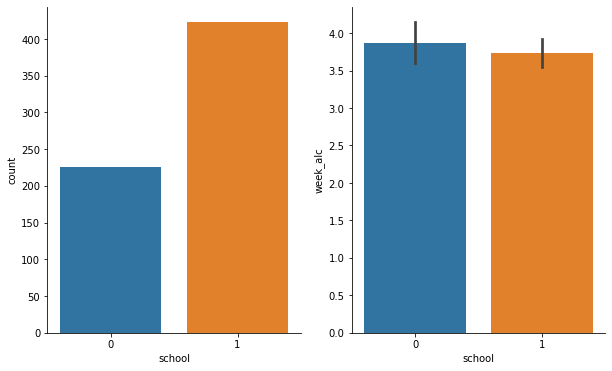

In [22]:
# Running descriptive analysis 
print("Descriptive Statistics :", '\n', df['school'].describe())

# To check correlation to alcohol consumption levels
print("Correlation with weekly alcohol consumption :", '\n', df['school'].corr(df['week_alc']))
print("Correlation with target var alc consumption :", '\n', df['school'].corr(df['alc']))

# Looking at proportions of values in the attribute
print("Number of Students at GP(1) :", df['school'].sum())
print("Number of Students at MS(0) :", df['school'].count() - df['school'].sum())
print("percentage of data distrib :", '\n', df.school.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="school", data=df,  ax = ax[0])
sns.barplot(x="school", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'school').mean()

* The school the student goes to is very weakly and negatively correlated with how much alcohol the student consumes. 
* 65% of the students go to GP(1) and 35% to MS(0). 
* Students going to MS have higher grade averages than students going to GP, but students going to MS seem to have a higher average absence than the students going to GP, also students at GP have a higher failure average than students at MS. 
* Students going to MS receive on average more extra educational support than students at GP.
* All other variables have similar averages between the two schools
 
 **From the barplot of school vs week_alc**

* Student at both the school on average consume alcohol at similar rates per week. 
* Most of the students at both schools have low or weekly alchohol consumption of less than 5.  
* Students at MS have a higher weekly alcohol consumption than students at GP, when less students in the dataset go there than at MS.

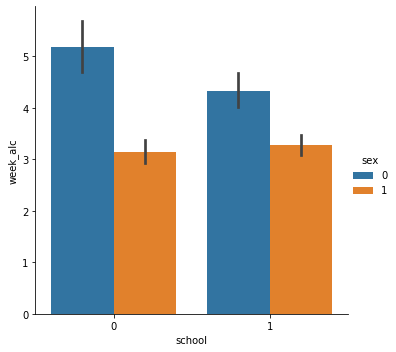

In [23]:
# distribution and relation between the sex of the student and the school they go to
sns.catplot(x="school", y="week_alc", hue="sex", kind="bar", data=df)


Male students at MS have a higher alcohol consumption value than male students who go to GP whereas female students at MS have a lower alcohol consumption value than those who go to GP.

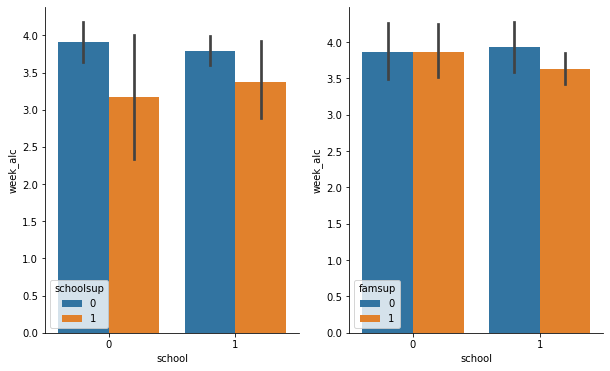

In [24]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="school", y="week_alc", hue="schoolsup", data=df, orient = 'v', ax = ax[0])
sns.barplot(x="school", y="week_alc", hue="famsup", data=df, orient = 'v', ax = ax[1])

# df.groupby(by= 'school').count()

* In total more students at MS receive extra educational support from school

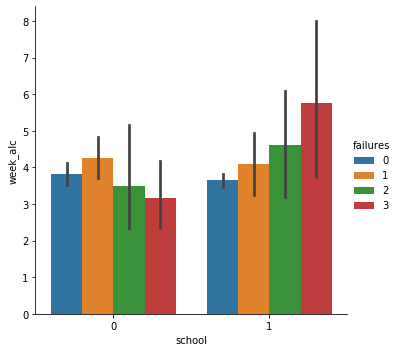

In [25]:
sns.catplot(x="school", y="week_alc", hue="failures", kind="bar", data=df)


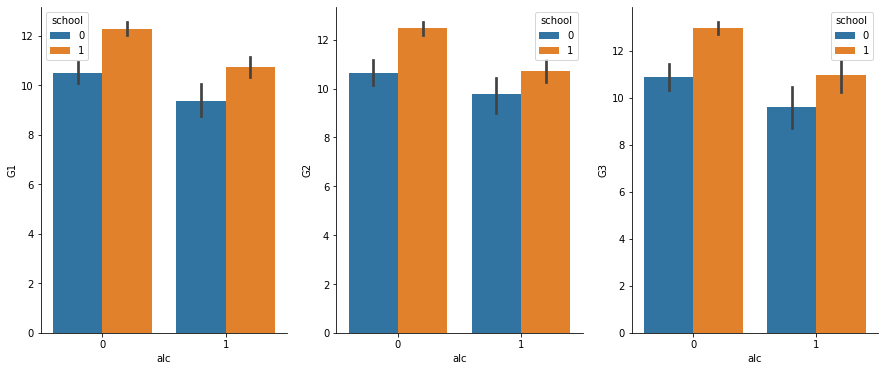

In [26]:
fig, ax = plt.subplots(1, 3, figsize= (15,6))
sns.despine(right=True)
sns.barplot(x="alc", y="G1", hue="school", data=df,  ax = ax[0])
sns.barplot(x="alc", y="G2", hue="school", data=df, ax = ax[1])
sns.barplot(x="alc", y="G3", hue="school", data=df,  ax = ax[2])


* For all students regardless of alcohol consumption, students at GP get higher grades than students at MS

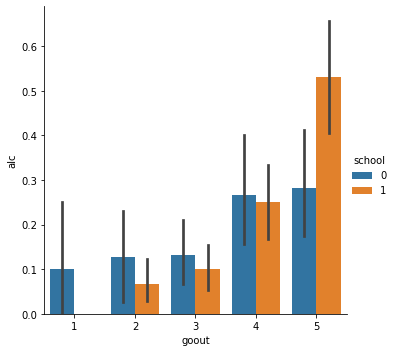

In [27]:
sns.catplot(x="goout", y="alc", hue="school", kind="bar", data=df)

* There is a strong correlation of students who go out often and how much alcohol they consume. 

### Var 2: sex
**Gender of student**

Descriptive Statistics : 
 count    649.000000
mean       0.590139
std        0.492187
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.3380108674864241
Correlation with target alc consumption : 
 -0.3213295395583069
Number of Female Students (1) : 383
Number of Male Students (0) : 266
percentage of data distrib : 
 1    0.590139
0    0.409861
Name: sex, dtype: float64


,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.699248,16.680451,0.289474,0.650376,0.902256,2.676692,2.417293,3.330827,3.721805,2.398496,1.804511,1.605263,1.725564,0.274436,0.063910,0.537594,0.082707,0.56015,0.781955,0.872180,0.800752,0.304511,4.026316,3.364662,3.266917,1.815789,2.774436,3.778195,3.778195,11.056391,11.206767,11.406015,4.590226,0.334586
1,0.618799,16.788512,0.313316,0.741514,0.859008,2.402089,2.229765,3.182768,3.783290,2.454308,1.843342,1.543081,2.073107,0.185379,0.133159,0.665796,0.044386,0.43342,0.817232,0.908616,0.744125,0.412533,3.864230,3.052219,3.127937,1.284595,1.937337,3.368146,3.577023,11.637076,11.822454,12.253264,3.221932,0.080940


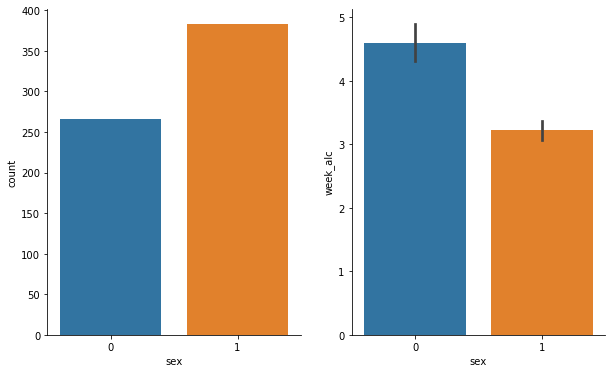

In [28]:
print("Descriptive Statistics :", '\n', df['sex'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['sex'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['sex'].corr(df['alc']))
print("Number of Female Students (1) :", df['sex'].sum())
print("Number of Male Students (0) :", df['sex'].count() - df['sex'].sum())
print("percentage of data distrib :", '\n', df.sex.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="sex", data=df,  ax = ax[0])
sns.barplot(x="sex", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'sex').mean()

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

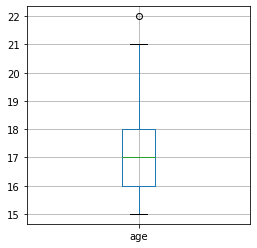

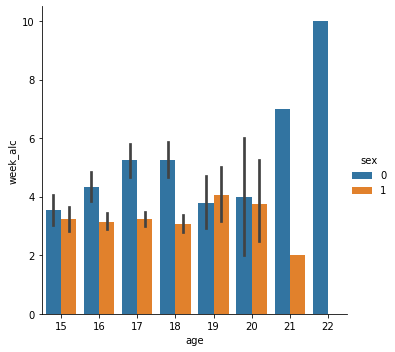

In [29]:
df.boxplot('age',figsize=(4,4))
sns.catplot(x="age", y="week_alc", hue="sex", kind="bar", data=df)
df['age'].value_counts()

### Var 3: age
**Age of student**

Descriptive Statistics : 
 count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Correlation with weekly alcohol consumption : 
 0.11822559469569464
Correlation with target alc consumption : 
 0.09356246369775748
Proportion of categories : 
 17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64
percentage of data distrib : 
 17    0.275809
16    0.272727
18    0.215716
15    0.172573
19    0.049307
20    0.009245
21    0.003082
22    0.001541
Name: age, dtype: float64


,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15,0.767857,0.508929,0.294643,0.696429,0.857143,2.750000,2.500000,3.107143,3.580357,2.339286,1.714286,1.517857,2.008929,0.035714,0.214286,0.696429,0.071429,0.508929,0.830357,0.973214,0.785714,0.250000,4.000000,3.258929,2.848214,1.383929,2.008929,3.482143,2.919643,11.758929,11.830357,12.107143,3.392857,0.151786
16,0.632768,0.593220,0.276836,0.706215,0.898305,2.514124,2.367232,3.406780,3.864407,2.474576,1.757062,1.570621,1.870056,0.118644,0.129944,0.615819,0.045198,0.525424,0.807910,0.943503,0.745763,0.310734,3.841808,3.135593,3.175141,1.395480,2.231638,3.542373,2.960452,11.723164,11.638418,11.994350,3.627119,0.158192
17,0.653631,0.631285,0.335196,0.731844,0.877095,2.491620,2.240223,3.324022,3.787709,2.491620,1.770950,1.553073,1.899441,0.217877,0.061453,0.625698,0.083799,0.474860,0.787709,0.910615,0.754190,0.391061,4.022346,3.206704,3.262570,1.553073,2.424581,3.670391,4.083799,11.519553,11.849162,12.268156,3.977654,0.189944
18,0.600000,0.600000,0.292857,0.642857,0.871429,2.492857,2.314286,3.107143,3.750000,2.364286,1.892857,1.614286,2.014286,0.285714,0.057143,0.557143,0.042857,0.442857,0.778571,0.828571,0.807143,0.457143,3.928571,3.071429,3.350000,1.564286,2.385714,3.392857,4.178571,11.200000,11.450000,11.771429,3.950000,0.207143
19,0.531250,0.593750,0.312500,0.812500,0.843750,2.031250,1.843750,2.906250,3.500000,2.343750,2.406250,1.593750,1.843750,0.875000,0.031250,0.562500,0.000000,0.406250,0.843750,0.625000,0.687500,0.468750,3.718750,3.468750,3.343750,1.781250,2.156250,3.562500,4.187500,9.031250,9.312500,9.531250,3.937500,0.250000
20,0.666667,0.666667,0.500000,1.000000,0.833333,1.833333,1.333333,3.833333,4.500000,2.833333,2.666667,1.833333,1.666667,0.833333,0.166667,0.333333,0.166667,0.500000,1.000000,0.666667,0.833333,0.833333,3.500000,3.166667,2.666667,1.333333,2.500000,3.666667,6.833333,10.333333,12.000000,12.000000,3.833333,0.333333
21,1.000000,0.500000,0.500000,0.000000,1.000000,2.500000,2.500000,3.000000,5.000000,2.500000,3.000000,1.500000,2.500000,2.000000,0.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,4.000000,3.000000,2.500000,3.000000,1.500000,4.500000,10.500000,9.000000,11.000000,11.000000,4.500000,0.500000
22,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,4.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,12.000000,7.000000,8.000000,5.000000,10.000000,1.000000


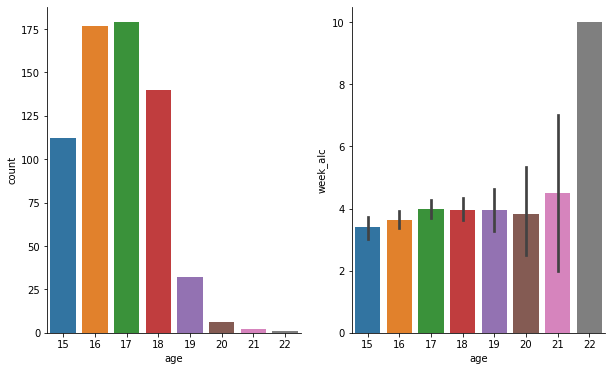

In [30]:
print("Descriptive Statistics :", '\n', df['age'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['age'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['age'].corr(df['alc']))
print("Proportion of categories :", '\n', df.age.value_counts())
print("percentage of data distrib :", '\n', df.age.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="age", data=df,  ax = ax[0])
sns.barplot(x="age", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'age').mean()

* Only 1 student at age 22 and has a very high alcohol consumption level. 2 values at 21 age but their alcohol consumption is only a little higher than the avg high school student. 
* The 22 year old student might be skewing the distribution to the right. **Removing this outlier**

### Var 4: address
**Student's home address setting- Urban or Rural**

Descriptive Statistics : 
 count    649.000000
mean       0.303544
std        0.460143
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: address, dtype: float64
Correlation with weekly alcohol consumption : 
 0.029961673036804057
Correlation with target alc consumption : 
 0.05675470273838154
Number of Rural Students (1) : 197
Number of Urban Students (0) : 452
percentage of data distrib : 
 0    0.696456
1    0.303544
Name: address, dtype: float64


,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
address,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.763274,0.581858,16.723451,0.690265,0.856195,2.657080,2.409292,3.294248,3.712389,2.327434,1.820796,1.398230,1.964602,0.196903,0.108407,0.615044,0.055310,0.482301,0.807522,0.909292,0.816372,0.358407,3.909292,3.154867,3.196903,1.473451,2.269912,3.539823,3.884956,11.683628,11.867257,12.263274,3.743363,0.170354
1,0.395939,0.609137,16.791878,0.736041,0.923858,2.187817,2.071066,3.126904,3.862944,2.670051,1.842640,1.959391,1.852792,0.279188,0.096447,0.609137,0.071066,0.492386,0.791878,0.857868,0.654822,0.390863,3.979695,3.238579,3.157360,1.568528,2.304569,3.527919,3.142132,10.746193,10.888325,11.086294,3.873096,0.218274


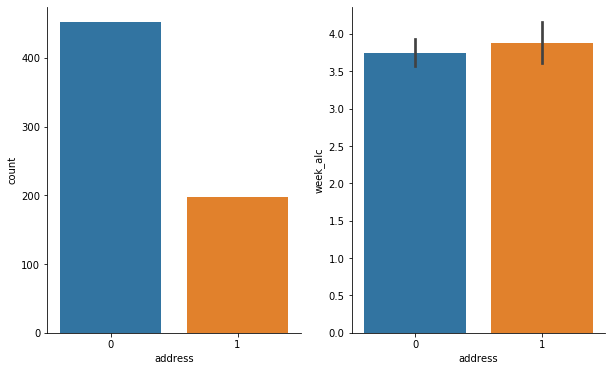

In [31]:
print("Descriptive Statistics :", '\n', df['address'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['address'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['address'].corr(df['alc']))
print("Number of Rural Students (1) :", df['address'].sum())
print("Number of Urban Students (0) :", df['address'].count() - df['address'].sum())
print("percentage of data distrib :", '\n', df.address.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="address", data=df,  ax = ax[0])
sns.barplot(x="address", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'address').mean()

### Var 5: famsize
**Student's family size - Less Than 3 or Greater than 3

Descriptive Statistics : 
 count    649.000000
mean       0.704160
std        0.456771
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: famsize, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.08090728087810722
Correlation with target alc consumption : 
 -0.05651703918824283
Number of Students with famsize of >3 (1) : 457
Number of Students with famsize of <3 (0) : 192
percentage of data distrib : 
 1    0.70416
0    0.29584
Name: famsize, dtype: float64


,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
famsize,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.635417,0.515625,16.739583,0.270833,0.755208,2.489583,2.239583,3.135417,3.770833,2.348958,1.828125,1.583333,1.916667,0.161458,0.078125,0.583333,0.041667,0.473958,0.864583,0.895833,0.776042,0.343750,3.93750,3.145833,3.177083,1.588542,2.442708,3.541667,3.692708,11.598958,11.744792,12.130208,4.031250,0.218750
1,0.658643,0.621444,16.746171,0.317287,0.927790,2.525164,2.334792,3.288840,3.752735,2.466083,1.827133,1.562363,1.936543,0.247265,0.115974,0.625821,0.067834,0.490153,0.776805,0.892779,0.763676,0.378556,3.92779,3.194748,3.188184,1.466083,2.212254,3.533917,3.645514,11.315098,11.496718,11.811816,3.678337,0.170678


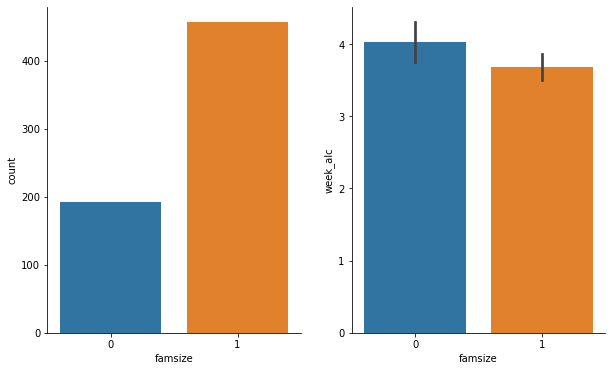

In [32]:
print("Descriptive Statistics :", '\n', df['famsize'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['famsize'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['famsize'].corr(df['alc']))
print("Number of Students with famsize of >3 (1) :", df['famsize'].sum())
print("Number of Students with famsize of <3 (0) :", df['famsize'].count() - df['famsize'].sum())
print("percentage of data distrib :", '\n', df.famsize.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="famsize", data=df,  ax = ax[0])
sns.barplot(x="famsize", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'famsize').mean()

### Var 6: Pstatus
**Student's parents cohabitation status- live together or apart

Descriptive Statistics : 
 count    649.000000
mean       0.876733
std        0.328996
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Pstatus, dtype: float64
Correlation with weekly alcohol consumption : 
 0.06502333618274145
Correlation with target alc consumption : 
 0.04578171188942873
# of Students whose parents live together(1) : 569
# of Students whose parents live apart(0) : 80
percentage of data distrib : 
 1    0.876733
0    0.123267
Name: Pstatus, dtype: float64


,school,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
Pstatus,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.687500,0.675000,16.762500,0.187500,0.412500,2.687500,2.400000,3.362500,4.050000,2.262500,2.062500,1.487500,1.950000,0.237500,0.112500,0.600000,0.050000,0.350000,0.837500,0.875000,0.700000,0.437500,3.800000,3.075000,3.087500,1.400000,2.037500,3.487500,5.112500,11.287500,11.42500,11.912500,3.437500,0.137500
1,0.646749,0.578207,16.741652,0.319859,0.745167,2.490334,2.293497,3.226714,3.717047,2.455185,1.794376,1.579965,1.927944,0.219684,0.103691,0.615114,0.061511,0.504394,0.797891,0.896309,0.776801,0.358524,3.949033,3.195079,3.198594,1.516696,2.314587,3.543058,3.455185,11.414763,11.59051,11.905097,3.831283,0.191564


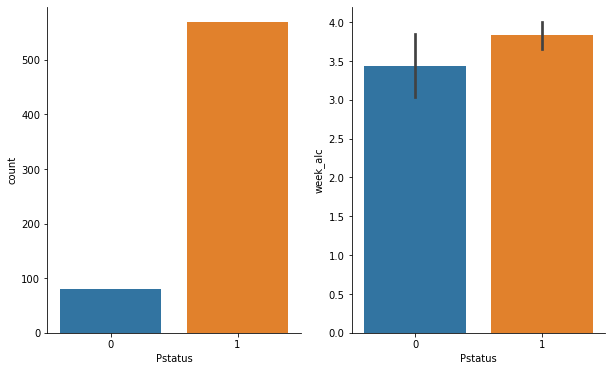

In [33]:
print("Descriptive Statistics :", '\n', df['Pstatus'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['Pstatus'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['Pstatus'].corr(df['alc']))
print("# of Students whose parents live together(1) :", df['Pstatus'].sum())
print("# of Students whose parents live apart(0) :", df['Pstatus'].count() - df['Pstatus'].sum())
print("percentage of data distrib :", '\n', df.Pstatus.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="Pstatus", data=df,  ax = ax[0])
sns.barplot(x="Pstatus", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'Pstatus').mean()

### Var 7: Medu 
**Student's mother's education level**
* 0 - none
* 1 - primary education (4th grade)
* 2 - 5th to 9th grade
* 3 - secondary education 
* 4 - higher education

Descriptive Statistics : 
 count    649.000000
mean       2.514638
std        1.134552
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.015999491044284015
Correlation with target alc consumption : 
 -0.037658665148360075
Proportion of categories : 
 2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64
percentage of data distrib : 
 2    0.286595
4    0.269646
1    0.220339
3    0.214176
0    0.009245
Name: Medu, dtype: float64


,school,sex,age,address,famsize,Pstatus,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
Medu,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.500000,0.833333,17.000000,0.333333,0.833333,1.000000,1.333333,3.000000,3.666667,3.000000,1.833333,1.666667,1.500000,0.333333,0.000000,0.500000,0.000000,0.333333,0.500000,0.833333,0.500000,0.000000,3.166667,3.333333,2.833333,1.666667,2.666667,4.000000,0.833333,10.833333,11.166667,11.666667,4.333333,0.333333
1,0.412587,0.643357,16.930070,0.454545,0.671329,0.916084,1.370629,2.986014,3.664336,2.615385,1.839161,1.860140,1.790210,0.391608,0.118881,0.552448,0.020979,0.398601,0.762238,0.811189,0.587413,0.412587,3.909091,3.237762,3.230769,1.587413,2.419580,3.503497,3.377622,10.398601,10.524476,10.797203,4.006993,0.244755
2,0.666667,0.639785,16.752688,0.317204,0.698925,0.881720,1.940860,3.370968,3.908602,2.440860,1.822581,1.672043,1.946237,0.198925,0.107527,0.564516,0.053763,0.494624,0.784946,0.854839,0.758065,0.381720,3.946237,3.150538,3.118280,1.360215,2.102151,3.543011,3.930108,11.204301,11.284946,11.661290,3.462366,0.123656
3,0.733813,0.561151,16.798561,0.258993,0.762590,0.820144,2.575540,3.201439,3.841727,2.251799,1.841727,1.424460,1.971223,0.280576,0.107914,0.640288,0.064748,0.438849,0.762590,0.913669,0.798561,0.338129,3.964029,3.165468,3.223022,1.625899,2.395683,3.503597,4.503597,11.323741,11.561151,11.920863,4.021583,0.215827
4,0.771429,0.508571,16.531429,0.200000,0.685714,0.880000,3.280000,3.360000,3.611429,2.394286,1.811429,1.331429,2.011429,0.057143,0.091429,0.697143,0.097143,0.588571,0.897143,0.988571,0.908571,0.354286,3.931429,3.171429,3.200000,1.480000,2.251429,3.565714,3.028571,12.502857,12.748571,13.068571,3.731429,0.171429


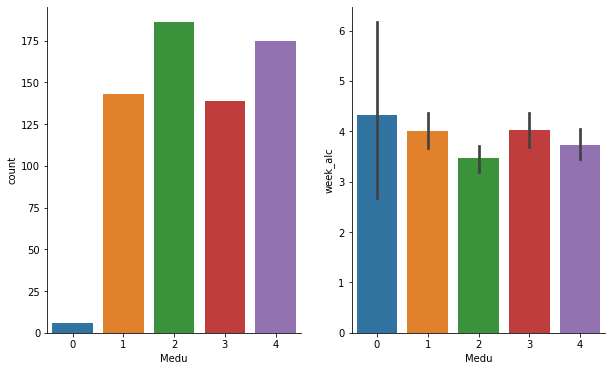

In [34]:
print("Descriptive Statistics :", '\n', df['Medu'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['Medu'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['Medu'].corr(df['alc']))
print("Proportion of categories :", '\n', df.Medu.value_counts())
print("percentage of data distrib :", '\n', df.Medu.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="Medu", data=df,  ax = ax[0])
sns.barplot(x="Medu", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'Medu').mean()

### Var 8: Fedu 
**Student's father's education level**
* 0 - none
* 1 - primary education (4th grade)
* 2 - 5th to 9th grade
* 3 - secondary education 
* 4 - higher education

Descriptive Statistics : 
 count    649.000000
mean       2.306626
std        1.099931
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64
Correlation with weekly alcohol consumption : 
 0.024811050000808042
Correlation with target alc consumption : 
 0.0007400446502543953
Proportion of categories : 
 2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64
percentage of data distrib : 
 2    0.322034
1    0.268105
3    0.201849
4    0.197227
0    0.010786
Name: Fedu, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
Fedu,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.428571,0.428571,17.142857,0.285714,0.857143,0.714286,1.285714,3.571429,4.428571,2.571429,2.142857,2.000000,1.714286,0.285714,0.285714,0.428571,0.000000,0.285714,1.000000,1.000000,0.714286,0.571429,4.000000,3.142857,2.571429,1.000000,1.000000,3.857143,1.428571,11.428571,11.571429,12.142857,2.000000,0.000000
1,0.528736,0.649425,16.965517,0.402299,0.672414,0.902299,1.655172,3.166667,3.862069,2.563218,1.908046,1.827586,1.833333,0.367816,0.086207,0.551724,0.034483,0.482759,0.770115,0.810345,0.689655,0.454023,3.902299,3.178161,3.172414,1.557471,2.316092,3.505747,3.465517,10.522989,10.695402,10.936782,3.873563,0.206897
2,0.617225,0.607656,16.722488,0.325359,0.684211,0.866029,2.258373,3.387560,3.832536,2.401914,1.813397,1.531100,1.980861,0.239234,0.095694,0.583732,0.052632,0.421053,0.765550,0.875598,0.698565,0.311005,3.904306,3.196172,3.181818,1.492823,2.205742,3.511962,3.688995,11.368421,11.411483,11.784689,3.698565,0.167464
3,0.755725,0.557252,16.648855,0.198473,0.763359,0.900763,3.022901,3.229008,3.679389,2.290076,1.770992,1.412214,1.977099,0.106870,0.129771,0.633588,0.076336,0.526718,0.847328,0.938931,0.885496,0.343511,4.007634,3.106870,3.198473,1.419847,2.381679,3.312977,4.061069,11.732824,11.992366,12.381679,3.801527,0.190840
4,0.781250,0.523438,16.554688,0.242188,0.710938,0.843750,3.648438,3.109375,3.539062,2.437500,1.781250,1.414062,1.945312,0.109375,0.109375,0.734375,0.093750,0.562500,0.851562,0.984375,0.867188,0.359375,3.929688,3.234375,3.226562,1.554688,2.320312,3.828125,3.585938,12.296875,12.585938,12.921875,3.875000,0.187500


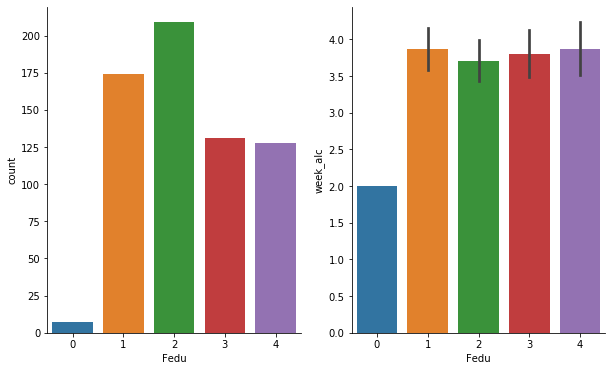

In [35]:
print("Descriptive Statistics :", '\n', df['Fedu'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['Fedu'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['Fedu'].corr(df['alc']))
print("Proportion of categories :", '\n', df.Fedu.value_counts())
print("percentage of data distrib :", '\n', df.Fedu.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="Fedu", data=df,  ax = ax[0])
sns.barplot(x="Fedu", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'Fedu').mean()

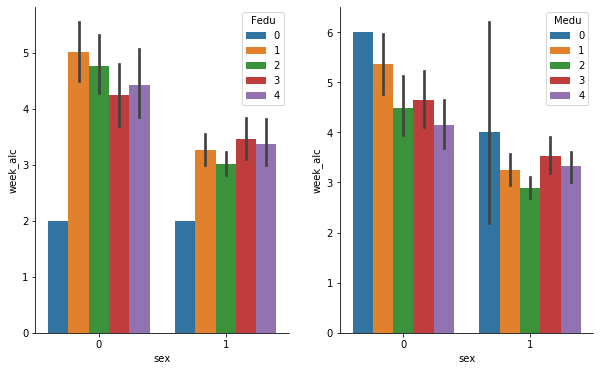

In [36]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="sex", y="week_alc", hue="Fedu", data=df, orient = 'v', ax = ax[0])
sns.barplot(x="sex", y="week_alc", hue="Medu", data=df, orient = 'v', ax = ax[1])

### Var 9: Mjob 
**Student's mother's job category**
* 1 - at_home
* 2 - services
* 3 - teacher
* 4 - health
* 5 - other

Descriptive Statistics : 
 count    649.000000
mean       3.243451
std        1.628041
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Mjob, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.042662290277749794
Correlation with target alc consumption : 
 -0.027360150863317317
Proportion of categories : 
 5    258
2    136
1    135
3     72
4     48
Name: Mjob, dtype: int64
percentage of data distrib : 
 5    0.397535
2    0.209553
1    0.208012
3    0.110940
4    0.073960
Name: Mjob, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
Mjob,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.466667,0.718519,16.955556,0.451852,0.696296,0.903704,1.681481,1.881481,3.622222,2.688889,1.874074,1.822222,1.866667,0.333333,0.096296,0.600000,0.059259,0.437037,0.800000,0.800000,0.570370,0.407407,3.911111,3.133333,3.096296,1.496296,2.259259,3.325926,3.570370,10.451852,10.711111,11.044444,3.755556,0.192593
2,0.764706,0.536765,16.661765,0.213235,0.683824,0.852941,2.801471,2.529412,3.345588,2.411765,1.801471,1.463235,1.977941,0.235294,0.132353,0.683824,0.080882,0.544118,0.823529,0.919118,0.889706,0.308824,4.000000,3.205882,3.286765,1.602941,2.404412,3.735294,4.301471,11.610294,11.720588,12.147059,4.007353,0.205882
3,0.791667,0.444444,16.583333,0.208333,0.652778,0.902778,3.958333,3.277778,3.500000,2.388889,1.916667,1.361111,2.013889,0.013889,0.055556,0.652778,0.055556,0.625000,0.888889,0.986111,0.944444,0.305556,3.930556,3.361111,3.000000,1.569444,2.347222,3.666667,3.111111,12.555556,12.694444,13.138889,3.916667,0.194444
4,0.770833,0.520833,16.312500,0.166667,0.687500,0.895833,3.562500,2.854167,3.708333,2.395833,1.687500,1.291667,1.875000,0.187500,0.041667,0.687500,0.062500,0.500000,0.854167,1.000000,0.895833,0.395833,3.833333,3.104167,3.354167,1.250000,2.395833,3.687500,2.104167,12.395833,12.645833,13.062500,3.645833,0.125000
5,0.627907,0.604651,16.802326,0.325581,0.736434,0.864341,2.201550,2.038760,4.127907,2.325581,1.817829,1.600775,1.926357,0.220930,0.120155,0.558140,0.050388,0.437984,0.759690,0.883721,0.732558,0.391473,3.922481,3.155039,3.197674,1.480620,2.186047,3.476744,3.810078,11.275194,11.426357,11.670543,3.666667,0.178295


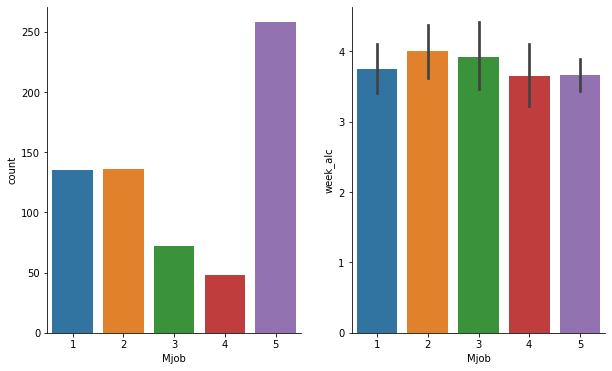

In [37]:
print("Descriptive Statistics :", '\n', df['Mjob'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['Mjob'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['Mjob'].corr(df['alc']))
print("Proportion of categories :", '\n', df.Mjob.value_counts())
print("percentage of data distrib :", '\n', df.Mjob.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="Mjob", data=df,  ax = ax[0])
sns.barplot(x="Mjob", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'Mjob').mean()

### Var 10: Fjob 
**Student's father's job category**
* 1 - at_home
* 2 - services
* 3 - teacher
* 4 - health
* 5 - other

Descriptive Statistics : 
 count    649.000000
mean       3.758089
std        1.504633
min        1.000000
25%        2.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Fjob, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.04020858906214162
Correlation with target alc consumption : 
 -0.0052024955229508065
Proportion of categories : 
 5    367
2    181
1     42
3     36
4     23
Name: Fjob, dtype: int64
percentage of data distrib : 
 5    0.565485
2    0.278891
1    0.064715
3    0.055470
4    0.035439
Name: Fjob, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
Fjob,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.404762,0.690476,17.000000,0.261905,0.666667,0.857143,2.095238,1.857143,2.666667,2.571429,1.833333,1.452381,1.904762,0.309524,0.119048,0.714286,0.071429,0.547619,0.857143,0.785714,0.595238,0.404762,3.642857,3.309524,3.119048,1.380952,2.000000,3.285714,4.452381,10.404762,10.785714,11.428571,3.380952,0.095238
2,0.602210,0.552486,16.696133,0.292818,0.701657,0.928177,2.491713,2.353591,2.911602,2.530387,1.734807,1.530387,1.950276,0.215470,0.077348,0.607735,0.060773,0.513812,0.795580,0.906077,0.801105,0.353591,3.994475,3.093923,3.132597,1.635359,2.491713,3.359116,3.397790,11.292818,11.370166,11.629834,4.127072,0.226519
3,0.833333,0.500000,16.472222,0.250000,0.861111,0.861111,3.722222,3.888889,3.166667,2.472222,1.694444,1.444444,1.861111,0.027778,0.194444,0.666667,0.027778,0.555556,0.777778,0.972222,0.777778,0.416667,3.750000,3.194444,3.000000,1.416667,1.833333,3.638889,3.333333,13.055556,13.333333,13.583333,3.250000,0.083333
4,0.782609,0.608696,16.086957,0.130435,0.652174,0.869565,3.434783,3.608696,3.304348,2.565217,1.608696,1.217391,2.347826,0.043478,0.217391,0.826087,0.043478,0.478261,0.913043,0.956522,0.782609,0.304348,4.000000,3.043478,3.347826,1.478261,2.173913,4.260870,3.043478,12.043478,12.260870,12.565217,3.652174,0.260870
5,0.678474,0.604905,16.806540,0.329700,0.697548,0.855586,2.397820,2.098093,3.476839,2.354223,1.899183,1.634877,1.904632,0.245232,0.100817,0.585831,0.062670,0.457766,0.795640,0.888283,0.768392,0.370572,3.945504,3.215259,3.226158,1.460490,2.258856,3.596730,3.768392,11.362398,11.542234,11.891008,3.719346,0.179837


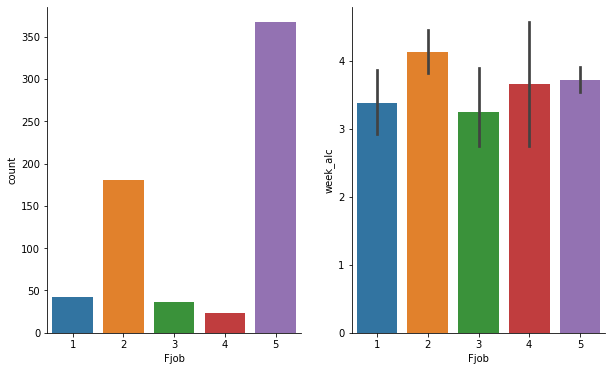

In [38]:
print("Descriptive Statistics :", '\n', df['Fjob'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['Fjob'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['Fjob'].corr(df['alc']))
print("Proportion of categories :", '\n', df.Fjob.value_counts())
print("percentage of data distrib :", '\n', df.Fjob.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="Fjob", data=df,  ax = ax[0])
sns.barplot(x="Fjob", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'Fjob').mean()

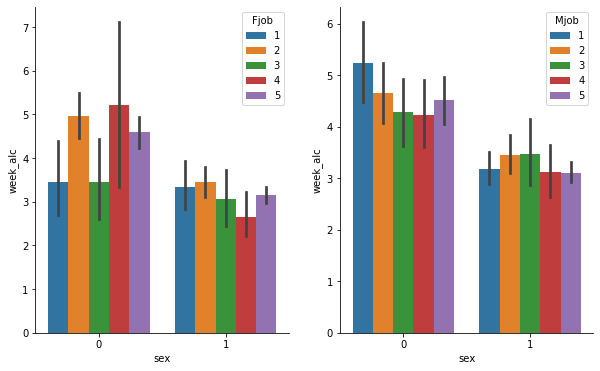

In [39]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="sex", y="week_alc", hue="Fjob", data=df, orient = 'v', ax = ax[0])
sns.barplot(x="sex", y="week_alc", hue="Mjob", data=df, orient = 'v', ax = ax[1])

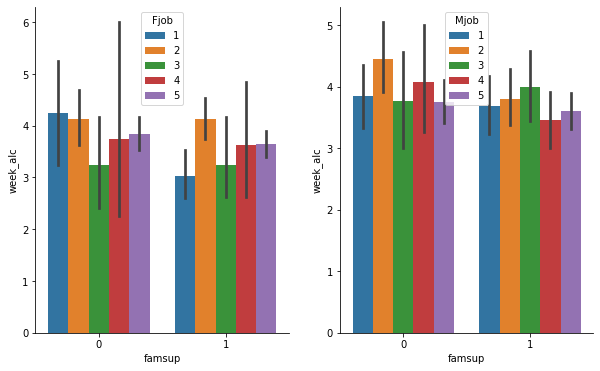

In [40]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="famsup", y="week_alc", hue="Fjob", data=df, orient = 'v', ax = ax[0])
sns.barplot(x="famsup", y="week_alc", hue="Mjob", data=df, orient = 'v', ax = ax[1])

### Var 11: reason 
**Student's reason for choice of school**
* 1 - close to home
* 2 - school reputation
* 3 - course preference
* 4 - other

Descriptive Statistics : 
 count    649.000000
mean       2.431433
std        0.963211
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: reason, dtype: float64
Correlation with weekly alcohol consumption : 
 0.02238049580578434
Correlation with target alc consumption : 
 0.03805436372905641
Proportion of categories : 
 3    285
1    149
2    143
4     72
Name: reason, dtype: int64
percentage of data distrib : 
 3    0.439137
1    0.229584
2    0.220339
4    0.110940
Name: reason, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
reason,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.771812,0.536913,16.711409,0.167785,0.684564,0.852349,2.590604,2.342282,3.496644,3.912752,1.852349,1.395973,1.912752,0.134228,0.134228,0.637584,0.087248,0.409396,0.785235,0.919463,0.818792,0.369128,3.892617,3.073826,3.154362,1.604027,2.322148,3.469799,4.456376,11.657718,11.785235,12.181208,3.926174,0.208054
2,0.797203,0.615385,16.706294,0.314685,0.664336,0.853147,2.797203,2.482517,3.454545,3.888112,1.783217,1.461538,2.209790,0.097902,0.118881,0.657343,0.020979,0.622378,0.839161,0.951049,0.853147,0.307692,3.993007,3.160839,3.174825,1.342657,2.216783,3.230769,3.811189,12.314685,12.587413,12.944056,3.559441,0.125874
3,0.585965,0.617544,16.785965,0.340351,0.719298,0.891228,2.361404,2.221053,3.066667,3.677193,1.856140,1.680702,1.852632,0.329825,0.080702,0.610526,0.059649,0.487719,0.792982,0.863158,0.712281,0.385965,3.908772,3.270175,3.203509,1.449123,2.235088,3.715789,3.389474,10.982456,11.147368,11.547368,3.684211,0.175439
4,0.375000,0.541667,16.722222,0.416667,0.763889,0.916667,2.402778,2.222222,3.000000,3.500000,1.750000,1.694444,1.722222,0.222222,0.111111,0.486111,0.083333,0.361111,0.805556,0.847222,0.708333,0.416667,3.972222,3.083333,3.194444,1.819444,2.500000,3.569444,2.777778,10.694444,10.777778,10.694444,4.319444,0.291667


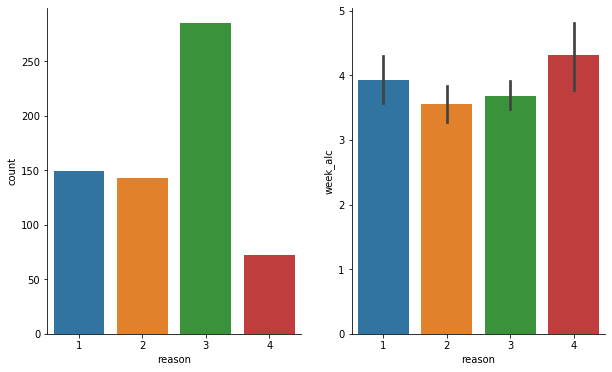

In [41]:
#Variable Reason: reason for choice of school
print("Descriptive Statistics :", '\n', df['reason'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['reason'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['reason'].corr(df['alc']))
print("Proportion of categories :", '\n', df.reason.value_counts())
print("percentage of data distrib :", '\n', df.reason.value_counts(normalize=True))

# 1=close to home, 2= school reputation, 3=course pref, 4 = other
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="reason", data=df,  ax = ax[0])
sns.barplot(x="reason", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'reason').mean()

### Var 12: guardian 
**Student's primary guardian**
* 1 - father
* 2 - mother
* 3 - other

Descriptive Statistics : 
 count    649.000000
mean       1.827427
std        0.519187
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: guardian, dtype: float64
Correlation with weekly alcohol consumption : 
 0.0054708450942087174
Correlation with target alc consumption : 
 0.036024763730976454
Proportion of categories : 
 2    455
1    153
3     41
Name: guardian, dtype: int64
percentage of data distrib : 
 2    0.701079
1    0.235747
3    0.063174
Name: guardian, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
guardian,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.594771,0.555556,16.444444,0.300654,0.712418,0.960784,2.431373,2.477124,3.444444,3.431373,2.444444,1.594771,1.954248,0.143791,0.124183,0.620915,0.032680,0.457516,0.784314,0.908497,0.777778,0.320261,3.973856,3.098039,3.065359,1.562092,2.300654,3.496732,2.869281,11.784314,11.875817,12.202614,3.862745,0.183007
2,0.668132,0.600000,16.705495,0.298901,0.698901,0.861538,2.582418,2.274725,3.153846,3.837363,2.437363,1.536264,1.920879,0.200000,0.101099,0.602198,0.065934,0.498901,0.821978,0.909890,0.760440,0.362637,3.938462,3.195604,3.217582,1.446154,2.274725,3.545055,3.674725,11.389011,11.573626,11.896703,3.720879,0.175824
3,0.682927,0.609756,18.292683,0.365854,0.731707,0.731707,2.073171,2.024390,3.487805,4.097561,2.317073,1.829268,1.951220,0.756098,0.073171,0.707317,0.097561,0.439024,0.658537,0.658537,0.804878,0.609756,3.682927,3.317073,3.268293,1.902439,2.268293,3.585366,6.439024,10.073171,10.390244,10.902439,4.170732,0.292683


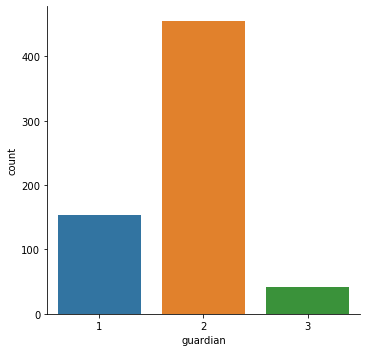

In [42]:
print("Descriptive Statistics :", '\n', df['guardian'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['guardian'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['guardian'].corr(df['alc']))
print("Proportion of categories :", '\n', df.guardian.value_counts())
print("percentage of data distrib :", '\n', df.guardian.value_counts(normalize=True))
sns.catplot(x="guardian", kind="count", data=df)
df.groupby(by= 'guardian').mean()

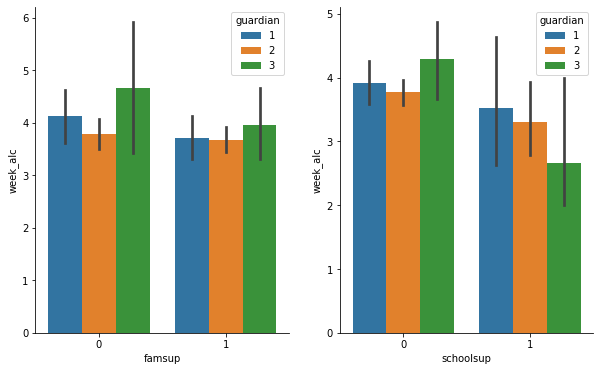

In [43]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="schoolsup", y="week_alc", hue="guardian", data=df, orient = 'v', ax = ax[1])
sns.barplot(x="famsup", y="week_alc", hue="guardian", data=df, orient = 'v', ax = ax[0])

### Var 13: traveltime 
**Student's traveltime between home to school**
* 1 - Less than  15 minutes
* 2 - 15 min to 30 min
* 3 - 30 min to 1 hr
* 4 - More than 1 hr

Descriptive Statistics : 
 count    649.000000
mean       1.568567
std        0.748660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
Correlation with weekly alcohol consumption : 
 0.07983592163000598
Correlation with target alc consumption : 
 0.08367915515959588
Proportion of categories : 
 1    366
2    213
3     54
4     16
Name: traveltime, dtype: int64
percentage of data distrib : 
 1    0.563945
2    0.328197
3    0.083205
4    0.024653
Name: traveltime, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
traveltime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.773224,0.595628,16.653005,0.172131,0.710383,0.866120,2.756831,2.513661,3.327869,3.669399,2.316940,1.808743,1.983607,0.161202,0.122951,0.644809,0.062842,0.494536,0.808743,0.920765,0.822404,0.366120,3.975410,3.188525,3.161202,1.456284,2.254098,3.612022,3.653005,11.759563,11.907104,12.251366,3.710383,0.177596
2,0.511737,0.605634,16.929577,0.417840,0.694836,0.882629,2.305164,2.075117,3.154930,3.835681,2.492958,1.859155,1.882629,0.286385,0.079812,0.549296,0.070423,0.483568,0.798122,0.854460,0.741784,0.375587,3.816901,3.150235,3.145540,1.502347,2.244131,3.436620,3.718310,11.046948,11.309859,11.577465,3.746479,0.154930
3,0.370370,0.537037,16.759259,0.648148,0.703704,0.925926,1.944444,1.981481,3.166667,3.888889,2.870370,1.833333,1.703704,0.425926,0.055556,0.648148,0.018519,0.462963,0.759259,0.851852,0.574074,0.333333,4.000000,3.240741,3.370370,1.666667,2.444444,3.407407,3.666667,10.648148,10.814815,11.166667,4.111111,0.277778
4,0.687500,0.437500,16.312500,0.625000,0.687500,0.875000,1.687500,1.750000,2.750000,4.312500,2.750000,1.812500,2.125000,0.062500,0.187500,0.625000,0.000000,0.375000,0.875000,0.937500,0.500000,0.437500,4.187500,3.187500,3.625000,2.000000,2.812500,3.562500,3.000000,10.375000,9.875000,10.875000,4.812500,0.437500


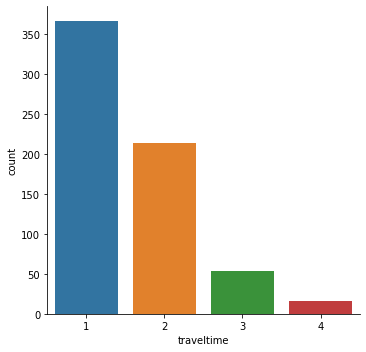

In [44]:
print("Descriptive Statistics :", '\n', df['traveltime'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['traveltime'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['traveltime'].corr(df['alc']))
print("Proportion of categories :", '\n', df.traveltime.value_counts())
print("percentage of data distrib :", '\n', df.traveltime.value_counts(normalize=True))
sns.catplot(x="traveltime", kind="count", data=df)
df.groupby(by= 'traveltime').mean()

### Var 14: studytime 
**Student's time spent studying in a week**
* 1 - Less than 2 hr
* 2 - 2 hrs to 5 hrs
* 3 - 5 hrs to 10 hrs
* 4 - More than 10 hrs

Descriptive Statistics : 
 count    649.000000
mean       1.930663
std        0.829510
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.202412352247314
Correlation with target alc consumption : 
 -0.18521489615537157
Proportion of categories : 
 2    305
1    212
3     97
4     35
Name: studytime, dtype: int64
percentage of data distrib : 
 2    0.469954
1    0.326656
3    0.149461
4    0.053929
Name: studytime, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
studytime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.561321,0.419811,16.712264,0.367925,0.702830,0.905660,2.367925,2.198113,3.259434,3.731132,2.584906,1.839623,1.660377,0.334906,0.056604,0.504717,0.061321,0.438679,0.783019,0.792453,0.750000,0.325472,3.905660,3.264151,3.254717,1.735849,2.679245,3.759434,4.339623,10.504717,10.702830,10.844340,4.415094,0.301887
2,0.675410,0.649180,16.760656,0.259016,0.691803,0.842623,2.547541,2.337705,3.216393,3.849180,2.354098,1.806557,1.531148,0.200000,0.131148,0.655738,0.062295,0.501639,0.803279,0.937705,0.763934,0.383607,3.944262,3.167213,3.232787,1.406557,2.177049,3.344262,3.600000,11.537705,11.662295,12.091803,3.583607,0.147541
3,0.731959,0.773196,16.907216,0.319588,0.762887,0.917526,2.659794,2.515464,3.247423,3.474227,2.422680,1.907216,1.463918,0.103093,0.103093,0.670103,0.041237,0.494845,0.835052,0.958763,0.814433,0.463918,4.030928,3.113402,2.917526,1.278351,1.845361,3.731959,2.618557,12.422680,12.793814,13.226804,3.123711,0.051546
4,0.771429,0.600000,16.342857,0.257143,0.657143,0.885714,2.714286,2.114286,3.371429,3.914286,2.200000,1.714286,1.628571,0.057143,0.171429,0.742857,0.085714,0.600000,0.828571,0.942857,0.771429,0.228571,3.685714,2.971429,3.085714,1.542857,1.971429,3.314286,2.942857,12.771429,12.628571,13.057143,3.514286,0.171429


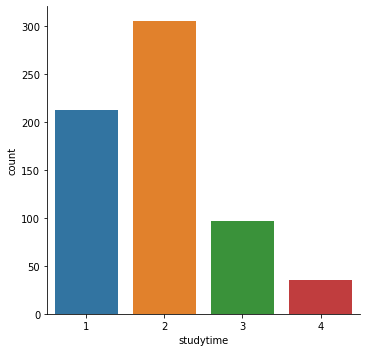

In [45]:
print("Descriptive Statistics :", '\n', df['studytime'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['studytime'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['studytime'].corr(df['alc']))
print("Proportion of categories :", '\n', df.studytime.value_counts())
print("percentage of data distrib :", '\n', df.studytime.value_counts(normalize=True))
sns.catplot(x="studytime", kind="count", data=df)
df.groupby(by= 'studytime').mean()

### Var 15: failures 
**Student's number of class failures**
* 0 - No classes failed in the past
* 1 - 1 class failed in the past
* 2 - 2 class failed in the past
* 3 - 3 class failed in the past
* 4 - 4 class failed in the past

Descriptive Statistics : 
 count    649.000000
mean       0.221880
std        0.593235
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
Correlation with weekly alcohol consumption : 
 0.10221109384670304
Correlation with target alc consumption : 
 0.10963658387870358
Proportion of categories : 
 0    549
1     70
2     16
3     14
Name: failures, dtype: int64
percentage of data distrib : 
 0    0.845917
1    0.107858
2    0.024653
3    0.021572
Name: failures, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
failures,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.684882,0.599271,16.575592,0.285974,0.690346,0.876138,2.615665,2.378871,3.273224,3.761384,2.380692,1.790528,1.533698,1.985428,0.105647,0.615665,0.052823,0.495446,0.810565,0.934426,0.779599,0.351548,3.959927,3.140255,3.167577,1.453552,2.242259,3.513661,3.351548,11.888889,12.102004,12.510018,3.695811,0.167577
1,0.414286,0.600000,17.485714,0.442857,0.800000,0.914286,1.942857,2.028571,3.142857,3.628571,2.642857,1.957143,1.771429,1.628571,0.100000,0.600000,0.100000,0.371429,0.800000,0.714286,0.757143,0.457143,3.785714,3.285714,3.185714,1.785714,2.414286,3.600000,5.700000,8.900000,8.700000,8.642857,4.200000,0.257143
2,0.625000,0.437500,18.250000,0.187500,0.562500,0.687500,1.812500,1.687500,3.187500,4.125000,3.062500,2.375000,1.625000,1.875000,0.062500,0.562500,0.062500,0.437500,0.687500,0.562500,0.562500,0.500000,3.625000,3.625000,3.687500,1.687500,2.500000,4.062500,3.812500,8.187500,8.937500,8.812500,4.187500,0.312500
3,0.571429,0.357143,17.928571,0.428571,0.928571,0.928571,2.214286,1.571429,2.642857,3.857143,2.642857,2.000000,1.857143,1.357143,0.142857,0.642857,0.142857,0.714286,0.642857,0.571429,0.571429,0.428571,3.857143,3.714286,3.285714,1.785714,2.857143,3.500000,5.357143,8.357143,8.071429,8.071429,4.642857,0.357143


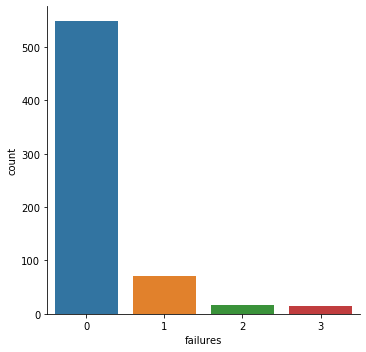

In [46]:
print("Descriptive Statistics :", '\n', df['failures'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['failures'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['failures'].corr(df['alc']))
print("Proportion of categories :", '\n', df.failures.value_counts())
print("percentage of data distrib :", '\n', df.failures.value_counts(normalize=True))
sns.catplot(x="failures", kind="count", data=df)
df.groupby(by= 'failures').mean()

### Var 16: schoolsup 
**Whether student gets xxtra educational suuport from school or not**

In [47]:
print("Descriptive Statistics :", '\n', df['schoolsup'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['schoolsup'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['schoolsup'].corr(df['alc']))
print("# of Students with extra educational support (1) :", df['schoolsup'].sum())
print("# of Students with no extra education support (0) :", df['schoolsup'].count() - df['schoolsup'].sum())
print("percentage of data distrib :", '\n', df.schoolsup.value_counts(normalize=True))
df.groupby(by= 'schoolsup').mean()

Descriptive Statistics : 
 count    649.000000
mean       0.104777
std        0.306502
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: schoolsup, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.07638380351396866
Correlation with target alc consumption : 
 -0.04630626651839892
# of Students with extra educational support (1) : 68
# of Students with no extra education support (0) : 581
percentage of data distrib : 
 0    0.895223
1    0.104777
Name: schoolsup, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
schoolsup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.631670,0.571429,16.814114,0.306368,0.695353,0.877797,2.523236,2.297762,3.237522,3.752151,2.449225,1.834768,1.580034,1.905336,0.222031,0.600688,0.056799,0.490534,0.800344,0.884682,0.771084,0.383821,3.934596,3.185886,3.208262,1.511188,2.323580,3.524957,3.753873,11.466437,11.626506,11.979346,3.834768,0.191050
1,0.823529,0.750000,16.147059,0.279412,0.779412,0.867647,2.441176,2.382353,3.294118,3.808824,2.279412,1.764706,1.470588,2.147059,0.220588,0.720588,0.088235,0.441176,0.823529,0.970588,0.735294,0.235294,3.897059,3.132353,2.985294,1.426471,1.911765,3.632353,2.852941,10.823529,11.088235,11.279412,3.338235,0.132353


### Var 17: famsup 
**Whether student get educational support from family or not**

In [48]:
print("Descriptive Statistics :", '\n', df['famsup'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['famsup'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['famsup'].corr(df['alc']))
print("# of Students with extra educational support (1) :", df['famsup'].sum())
print("# of Students with no extra education support (0) :", df['famsup'].count() - df['schoolsup'].sum())
print("percentage of data distrib :", '\n', df.schoolsup.value_counts(normalize=True))
df.groupby(by= 'famsup').mean()

Descriptive Statistics : 
 count    649.000000
mean       0.613251
std        0.487381
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: famsup, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.05010987749278572
Correlation with target alc consumption : 
 -0.0863076890240606
# of Students with extra educational support (1) : 398
# of Students with no extra education support (0) : 581
percentage of data distrib : 
 0    0.895223
1    0.104777
Name: schoolsup, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
famsup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.613546,0.509960,16.900398,0.306773,0.681275,0.872510,2.342629,2.119522,3.366534,3.848606,2.521912,1.816733,1.605578,1.780876,0.227092,0.075697,0.031873,0.490040,0.788845,0.860558,0.729084,0.382470,3.912351,3.175299,3.159363,1.521912,2.386454,3.501992,3.414343,11.266932,11.430279,11.665339,3.908367,0.227092
1,0.675879,0.640704,16.645729,0.301508,0.718593,0.879397,2.623116,2.424623,3.165829,3.701005,2.374372,1.834171,1.545226,2.025126,0.218593,0.123116,0.077889,0.482412,0.811558,0.914573,0.791457,0.359296,3.942211,3.183417,3.201005,1.489950,2.213568,3.557789,3.814070,11.482412,11.658291,12.057789,3.703518,0.158291


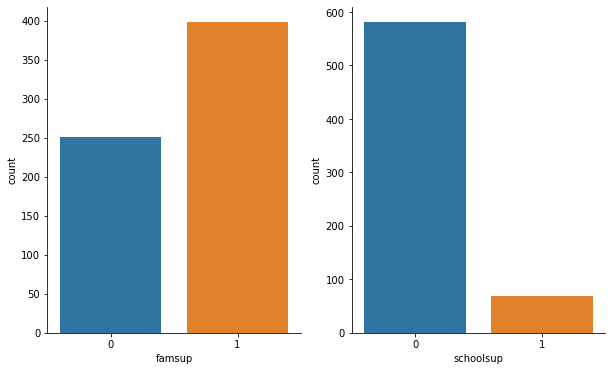

In [49]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="schoolsup", data=df,  ax = ax[1])
sns.countplot(x="famsup",  data=df,  ax = ax[0])

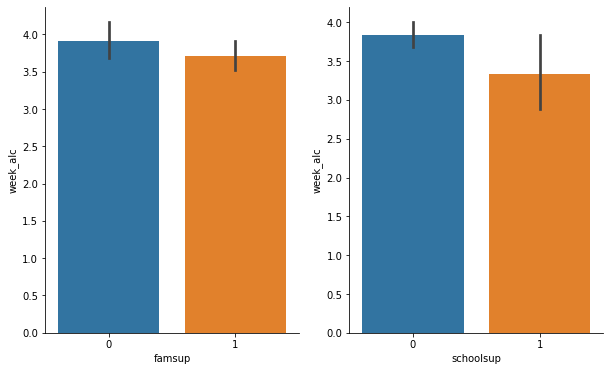

In [50]:
fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.barplot(x="schoolsup",y = 'week_alc', data=df,  ax = ax[1])
sns.barplot(x="famsup", y = 'week_alc', data=df,  ax = ax[0])

### Var 18: paid 
**Whether the Student receives extra paid classes within the course**

Descriptive Statistics : 
 count    649.000000
mean       0.060092
std        0.237841
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: paid, dtype: float64
Correlation with weekly alcohol consumption : 
 0.04713226512235819
Correlation with target alc consumption : 
 0.06327655821658448
# of Students whose parents live together(1) : 39
# of Students whose parents live apart(0) : 610
percentage of data distrib : 
 0    0.939908
1    0.060092
Name: paid, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
paid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.650820,0.600000,16.745902,0.300000,0.698361,0.875410,2.481967,2.280328,3.255738,3.757377,2.432787,1.818033,1.577049,1.931148,0.211475,0.101639,0.601639,0.477049,0.800000,0.891803,0.763934,0.370492,3.922951,3.193443,3.186885,1.490164,2.268852,3.513115,3.701639,11.442623,11.595082,11.950820,3.759016,0.178689
1,0.666667,0.435897,16.717949,0.358974,0.794872,0.897436,3.025641,2.717949,3.051282,3.769231,2.410256,1.974359,1.435897,1.923077,0.384615,0.153846,0.794872,0.615385,0.846154,0.923077,0.820513,0.333333,4.051282,2.974359,3.153846,1.692308,2.461538,3.897436,3.000000,10.717949,11.179487,11.205128,4.153846,0.282051


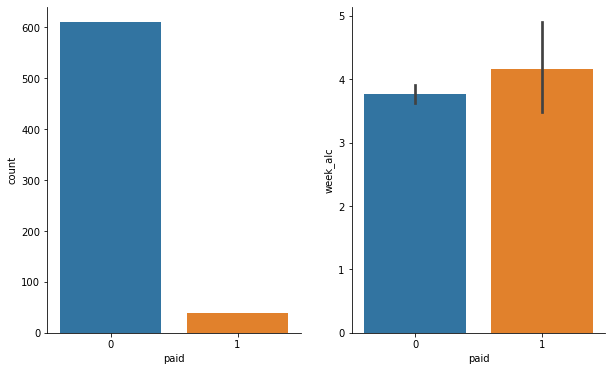

In [51]:
print("Descriptive Statistics :", '\n', df['paid'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['paid'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['paid'].corr(df['alc']))
print("# of Students whose parents live together(1) :", df['paid'].sum())
print("# of Students whose parents live apart(0) :", df['paid'].count() - df['paid'].sum())
print("percentage of data distrib :", '\n', df.paid.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="paid", data=df,  ax = ax[0])
sns.barplot(x="paid", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'paid').mean()

### Var 19: activities 
**Whether the Student participates in extra curricular activities or not**

Descriptive Statistics : 
 count    649.000000
mean       0.485362
std        0.500171
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: activities, dtype: float64
Correlation with weekly alcohol consumption : 
 0.031646411428799114
Correlation with target alc consumption : 
 0.04571512359035619
# of Students participating in extra curr activities(1) : 315
# of Students not participating in extra curr activities(0) : 334
percentage of data distrib : 
 0    0.514638
1    0.485362
Name: activities, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
activities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.610778,0.649701,16.808383,0.299401,0.697605,0.844311,2.383234,2.221557,3.299401,3.850299,2.449102,1.820359,1.592814,1.874251,0.221557,0.113772,0.616766,0.04491,0.787425,0.880240,0.733533,0.341317,3.877246,3.026946,3.083832,1.482036,2.239521,3.517964,3.727545,11.185629,11.380240,11.718563,3.721557,0.167665
1,0.695238,0.526984,16.676190,0.307937,0.711111,0.911111,2.653968,2.396825,3.184127,3.660317,2.412698,1.834921,1.542857,1.990476,0.222222,0.095238,0.609524,0.07619,0.819048,0.907937,0.803175,0.396825,3.987302,3.342857,3.292063,1.523810,2.323810,3.555556,3.587302,11.625397,11.771429,12.104762,3.847619,0.203175


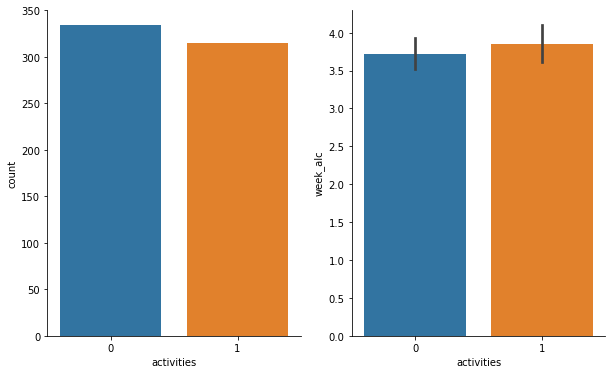

In [52]:
# Variable student extra curricular activites
print("Descriptive Statistics :", '\n', df['activities'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['activities'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['activities'].corr(df['alc']))
print("# of Students participating in extra curr activities(1) :", df['activities'].sum())
print("# of Students not participating in extra curr activities(0) :", df['activities'].count() - df['activities'].sum())
print("percentage of data distrib :", '\n', df.activities.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="activities", data=df,  ax = ax[0])
sns.barplot(x="activities", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'activities').mean()

Descriptive Statistics : 
 count    649.000000
mean       0.485362
std        0.500171
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: activities, dtype: float64
Correlation with weekly alcohol consumption : 
 0.031646411428799114
Correlation with target alc consumption : 
 0.04571512359035619
# of Students participating in extra curr activities(1) : 315
# of Students not participating in extra curr activities(0) : 334
percentage of data distrib : 
 0    0.514638
1    0.485362
Name: activities, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
activities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.610778,0.649701,16.808383,0.299401,0.697605,0.844311,2.383234,2.221557,3.299401,3.850299,2.449102,1.820359,1.592814,1.874251,0.221557,0.113772,0.616766,0.04491,0.787425,0.880240,0.733533,0.341317,3.877246,3.026946,3.083832,1.482036,2.239521,3.517964,3.727545,11.185629,11.380240,11.718563,3.721557,0.167665
1,0.695238,0.526984,16.676190,0.307937,0.711111,0.911111,2.653968,2.396825,3.184127,3.660317,2.412698,1.834921,1.542857,1.990476,0.222222,0.095238,0.609524,0.07619,0.819048,0.907937,0.803175,0.396825,3.987302,3.342857,3.292063,1.523810,2.323810,3.555556,3.587302,11.625397,11.771429,12.104762,3.847619,0.203175


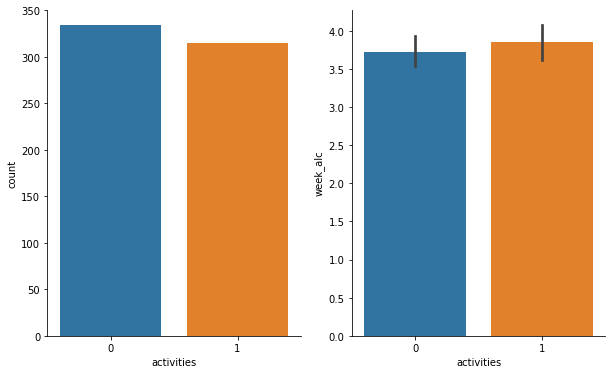

In [53]:
# Variable student extra curricular activites
print("Descriptive Statistics :", '\n', df['activities'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['activities'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['activities'].corr(df['alc']))
print("# of Students participating in extra curr activities(1) :", df['activities'].sum())
print("# of Students not participating in extra curr activities(0) :", df['activities'].count() - df['activities'].sum())
print("percentage of data distrib :", '\n', df.activities.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="activities", data=df,  ax = ax[0])
sns.barplot(x="activities", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'activities').mean()

### Var 20: nursery 
**Whether the Student attended nursery school or not**

Descriptive Statistics : 
 count    649.000000
mean       0.802773
std        0.398212
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: nursery, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.08521082588577235
Correlation with target alc consumption : 
 -0.07314310611881565
# of Students who attended nursery school(1) : 521
# of Students who did not attended nursery school(0) : 128
percentage of data distrib : 
 1    0.802773
0    0.197227
Name: nursery, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
nursery,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.656250,0.546875,16.796875,0.320312,0.796875,0.898438,2.226562,2.140625,3.414062,3.804688,2.429688,1.851562,1.585938,1.859375,0.304688,0.093750,0.585938,0.046875,0.445312,0.867188,0.773438,0.390625,3.851562,3.195312,3.140625,1.648438,2.476562,3.531250,4.039062,11.226562,11.335938,11.718750,4.125000,0.242188
1,0.650672,0.600768,16.731286,0.299424,0.681382,0.871401,2.585413,2.347409,3.201536,3.746641,2.431862,1.821497,1.564299,1.948177,0.201536,0.107486,0.619962,0.063340,0.495202,0.900192,0.765835,0.362764,3.950096,3.176583,3.195777,1.466411,2.232246,3.537428,3.566219,11.441459,11.627639,11.952015,3.698656,0.170825


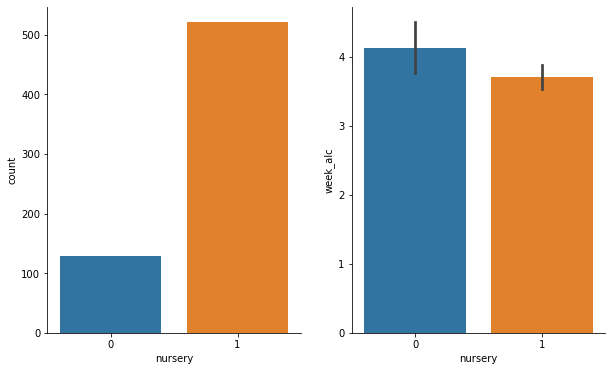

In [54]:
# Variable student's attendance to nursery school
print("Descriptive Statistics :", '\n', df['nursery'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['nursery'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['nursery'].corr(df['alc']))
print("# of Students who attended nursery school(1) :", df['nursery'].sum())
print("# of Students who did not attended nursery school(0) :", df['nursery'].count() - df['nursery'].sum())
print("percentage of data distrib :", '\n', df.nursery.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="nursery", data=df,  ax = ax[0])
sns.barplot(x="nursery", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'nursery').mean()

### Var 21: higher 
**Whether the student wants to take higher education classes or not**

Descriptive Statistics : 
 count    649.000000
mean       0.893683
std        0.308481
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: higher, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.11547498234477385
Correlation with target alc consumption : 
 -0.10612448524117601
# of Students who want to take higher education (1) : 580
# of Students who want to take higher education (0) : 69
percentage of data distrib : 
 1    0.893683
0    0.106317
Name: higher, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
higher,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.463768,0.507246,17.681159,0.405797,0.710145,0.855072,1.811594,1.695652,2.927536,3.695652,2.710145,2.000000,1.724638,1.478261,0.753623,0.028986,0.492754,0.043478,0.420290,0.753623,0.681159,0.507246,3.797101,3.492754,3.420290,1.855072,2.594203,3.463768,5.405797,8.623188,8.768116,8.797101,4.449275,0.304348
1,0.674138,0.600000,16.632759,0.291379,0.703448,0.879310,2.598276,2.379310,3.281034,3.765517,2.398276,1.806897,1.550000,1.984483,0.158621,0.113793,0.627586,0.062069,0.493103,0.808621,0.777586,0.351724,3.946552,3.143103,3.156897,1.460345,2.243103,3.544828,3.451724,11.729310,11.903448,12.275862,3.703448,0.170690


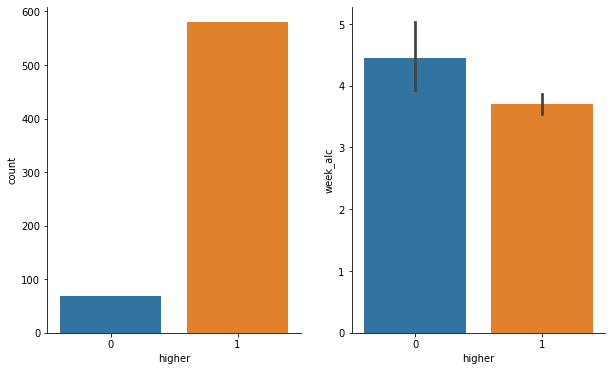

In [55]:
# Variable students desiring to attend higher education
print("Descriptive Statistics :", '\n', df['higher'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['higher'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['higher'].corr(df['alc']))
print("# of Students who want to take higher education (1) :", df['higher'].sum())
print("# of Students who want to take higher education (0) :", df['higher'].count() - df['higher'].sum())
print("percentage of data distrib :", '\n', df.higher.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="higher", data=df,  ax = ax[0])
sns.barplot(x="higher", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'higher').mean()

### Var 22: internet 
**Whether the student has access to internet or not**

Descriptive Statistics : 
 count    649.000000
mean       0.767334
std        0.422857
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: internet, dtype: float64
Correlation with weekly alcohol consumption : 
 0.05896980015440428
Correlation with target alc consumption : 
 0.02742758756378276
# of Students who have internet access (1) : 498
# of Students who do not have internet access (0) : 151
percentage of data distrib : 
 1    0.767334
0    0.232666
Name: internet, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
internet,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.443709,0.649007,16.715232,0.450331,0.715232,0.84106,1.966887,1.940397,3.079470,3.695364,2.642384,1.827815,1.827815,1.874172,0.324503,0.119205,0.549669,0.046358,0.410596,0.807947,0.854305,0.337748,3.788079,3.059603,2.986755,1.430464,2.139073,3.596026,3.092715,10.701987,10.788079,11.026490,3.569536,0.165563
1,0.714859,0.572289,16.753012,0.259036,0.700803,0.88755,2.680723,2.417671,3.293173,3.777108,2.367470,1.827309,1.489960,1.947791,0.190763,0.100402,0.632530,0.064257,0.508032,0.801205,0.905622,0.377510,3.973896,3.216867,3.244980,1.524096,2.323293,3.518072,3.831325,11.610442,11.807229,12.172691,3.847390,0.190763


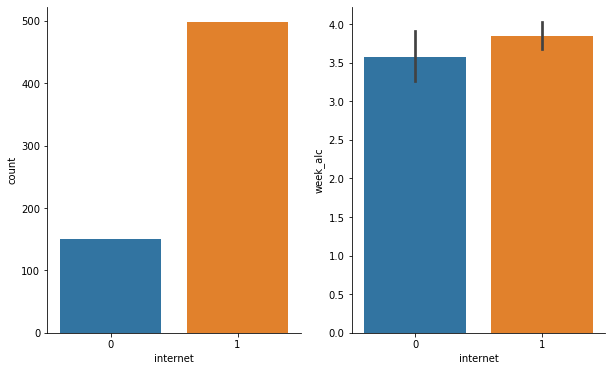

In [56]:
# Variable students access to internet
print("Descriptive Statistics :", '\n', df['internet'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['internet'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['internet'].corr(df['alc']))
print("# of Students who have internet access (1) :", df['internet'].sum())
print("# of Students who do not have internet access (0) :", df['internet'].count() - df['internet'].sum())
print("percentage of data distrib :", '\n', df.internet.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="internet", data=df,  ax = ax[0])
sns.barplot(x="internet", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'internet').mean()

### Var 23: romantic 
**Whether the student is in a romantic relationship or not**

Descriptive Statistics : 
 count    649.000000
mean       0.368259
std        0.482704
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: romantic, dtype: float64
Correlation with weekly alcohol consumption : 
 0.01592478695464221
Correlation with target alc consumption : 
 -0.018029772985608768
# of Students in romantic relationship (1) : 239
# of Students not in romatic relationship (0) : 410
percentage of data distrib : 
 0    0.631741
1    0.368259
Name: romantic, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
romantic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.678049,0.548780,16.578049,0.292683,0.692683,0.890244,2.541463,2.363415,3.217073,3.758537,2.402439,1.785366,1.565854,1.909756,0.190244,0.126829,0.621951,0.063415,0.463415,0.809756,0.917073,0.756098,3.963415,3.158537,3.185366,1.458537,2.300000,3.556098,3.378049,11.556098,11.787805,12.129268,3.758537,0.190244
1,0.606695,0.661088,17.029289,0.322176,0.723849,0.853556,2.468619,2.209205,3.288703,3.757322,2.481172,1.899582,1.573222,1.966527,0.276151,0.066946,0.598326,0.054393,0.523013,0.790795,0.853556,0.786611,3.874477,3.217573,3.184100,1.577406,2.246862,3.502092,4.142259,11.129707,11.196653,11.523013,3.824268,0.175732


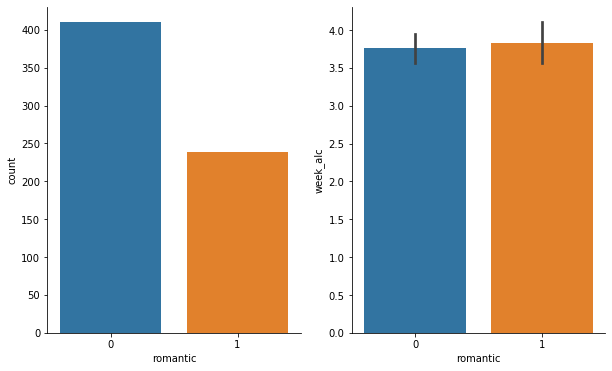

In [57]:
# Variable students in romantic relationship
print("Descriptive Statistics :", '\n', df['romantic'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['romantic'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['romantic'].corr(df['alc']))
print("# of Students in romantic relationship (1) :", df['romantic'].sum())
print("# of Students not in romatic relationship (0) :", df['romantic'].count() - df['romantic'].sum())
print("percentage of data distrib :", '\n', df.romantic.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="romantic", data=df,  ax = ax[0])
sns.barplot(x="romantic", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'romantic').mean()

### Var 24: famrel 
**Student's family relations quality**
* 1 very bad to 5 excellent

Descriptive Statistics : 
 count    649.000000
mean       3.930663
std        0.955717
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.09544995566966005
Correlation with target alc consumption : 
 -0.04854132574393436
Proportion of categories : 
 4    317
5    180
3    101
2     29
1     22
Name: famrel, dtype: int64
percentage of data distrib : 
 4    0.488444
5    0.277350
3    0.155624
2    0.044684
1    0.033898
Name: famrel, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
famrel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.409091,0.772727,16.772727,0.227273,0.681818,0.772727,2.409091,2.136364,3.636364,4.090909,2.363636,2.090909,1.727273,2.227273,0.227273,0.000000,0.590909,0.045455,0.409091,0.772727,0.772727,0.500000,0.590909,2.772727,2.681818,1.909091,2.409091,2.818182,4.954545,10.409091,10.272727,10.636364,4.318182,0.227273
2,0.586207,0.586207,16.862069,0.275862,0.620690,0.793103,2.620690,2.448276,3.068966,3.068966,2.758621,1.896552,1.551724,1.793103,0.413793,0.172414,0.586207,0.034483,0.482759,0.862069,0.896552,0.758621,0.275862,3.275862,3.413793,1.724138,2.655172,3.241379,5.000000,11.034483,10.448276,10.862069,4.379310,0.275862
3,0.722772,0.623762,16.772277,0.326733,0.762376,0.891089,2.455446,2.277228,3.267327,3.742574,2.316832,1.772277,1.544554,1.811881,0.346535,0.128713,0.554455,0.069307,0.455446,0.732673,0.881188,0.722772,0.366337,2.871287,3.000000,1.485149,2.485149,3.277228,4.128713,11.138614,11.207921,11.594059,3.970297,0.198020
4,0.662461,0.599369,16.735016,0.287066,0.700315,0.886435,2.498423,2.290221,3.208202,3.785489,2.416404,1.823344,1.558360,1.968454,0.160883,0.107256,0.649842,0.050473,0.470032,0.807571,0.905363,0.804416,0.375394,3.198738,3.173502,1.476341,2.246057,3.671924,3.444795,11.678233,11.958991,12.343849,3.722397,0.176656
5,0.633333,0.533333,16.722222,0.333333,0.694444,0.877778,2.572222,2.350000,3.272222,3.788889,2.477778,1.822222,1.583333,1.916667,0.227778,0.088889,0.588889,0.077778,0.538889,0.827778,0.894444,0.761111,0.344444,3.355556,3.333333,1.472222,2.150000,3.577778,3.400000,11.233333,11.427778,11.633333,3.622222,0.172222


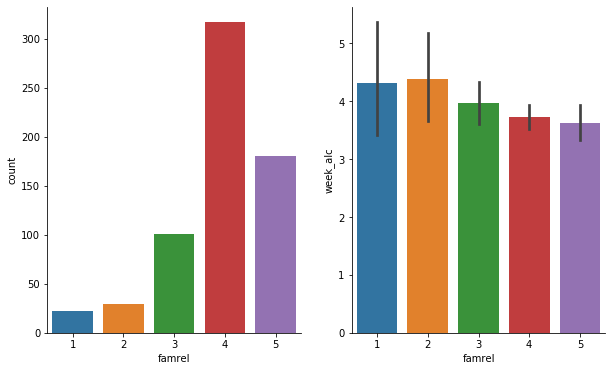

In [58]:
# Variable students quality of family relationship--- 1 very bad to 5 excellent
print("Descriptive Statistics :", '\n', df['famrel'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['famrel'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['famrel'].corr(df['alc']))
print("Proportion of categories :", '\n', df.famrel.value_counts())
print("percentage of data distrib :", '\n', df.famrel.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="famrel", data=df,  ax = ax[0])
sns.barplot(x="famrel", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'famrel').mean()

### Var 25: freetime 
**Amount of freetime the student has after school**
* 1 very low to 5 very high

Descriptive Statistics : 
 count    649.000000
mean       3.180277
std        1.051093
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
Correlation with weekly alcohol consumption : 
 0.12852841286467245
Correlation with target alc consumption : 
 0.11097645080946898
Amount of freetime after school --- 1 very low to 5 very high
Proportion of categories : 
 3    251
4    178
2    107
5     68
1     45
Name: freetime, dtype: int64
percentage of data distrib : 
 3    0.386749
4    0.274268
2    0.164869
5    0.104777
1    0.069337
Name: freetime, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,goout,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
freetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.511111,0.666667,16.733333,0.355556,0.666667,0.844444,2.377778,2.155556,3.288889,3.644444,2.355556,1.711111,1.644444,1.755556,0.133333,0.155556,0.555556,0.111111,0.222222,0.844444,0.911111,0.644444,0.244444,3.800000,2.555556,1.577778,2.088889,3.133333,4.088889,11.066667,11.444444,11.733333,3.666667,0.177778
2,0.682243,0.644860,16.757009,0.280374,0.719626,0.878505,2.700935,2.364486,3.364486,3.728972,2.457944,1.813084,1.635514,1.962617,0.168224,0.056075,0.560748,0.084112,0.448598,0.822430,0.915888,0.738318,0.420561,3.635514,2.700935,1.355140,2.177570,3.429907,3.523364,12.046729,12.233645,12.710280,3.532710,0.149533
3,0.713147,0.657371,16.737052,0.282869,0.709163,0.852590,2.494024,2.314741,3.127490,3.689243,2.386454,1.836653,1.501992,2.067729,0.175299,0.127490,0.665339,0.043825,0.498008,0.796813,0.920319,0.780876,0.374502,3.944223,3.027888,1.382470,2.139442,3.501992,3.796813,11.509960,11.669323,12.059761,3.521912,0.123506
4,0.629213,0.500000,16.775281,0.286517,0.662921,0.926966,2.460674,2.303371,3.348315,3.966292,2.432584,1.842697,1.556180,1.882022,0.292135,0.095506,0.612360,0.056180,0.494382,0.752809,0.882022,0.803371,0.331461,4.084270,3.578652,1.640449,2.466292,3.764045,3.415730,11.247191,11.410112,11.713483,4.106742,0.264045
5,0.529412,0.441176,16.676471,0.426471,0.794118,0.852941,2.529412,2.294118,3.176471,3.588235,2.602941,1.852941,1.691176,1.617647,0.352941,0.088235,0.544118,0.058824,0.647059,0.897059,0.779412,0.750000,0.441176,4.029412,3.911765,1.764706,2.602941,3.500000,3.720588,10.588235,10.661765,10.691176,4.367647,0.264706


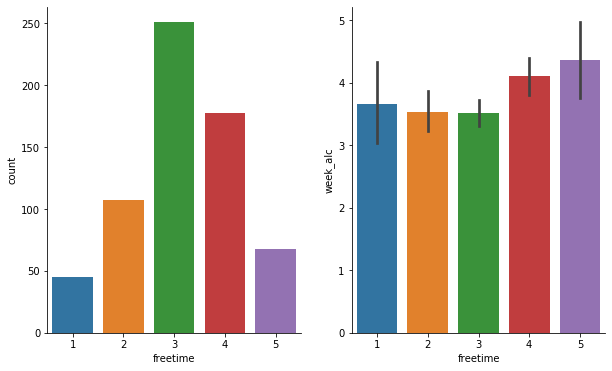

In [59]:
#Variable freetime == amount of freetime after school --- 1 very low to 5 very high
print("Descriptive Statistics :", '\n', df['freetime'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['freetime'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['freetime'].corr(df['alc']))
print("Amount of freetime after school --- 1 very low to 5 very high")
print("Proportion of categories :", '\n', df.freetime.value_counts())
print("percentage of data distrib :", '\n', df.freetime.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="freetime", data=df,  ax = ax[0])
sns.barplot(x="freetime", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'freetime').mean()

### Var 26: goout 
**Amount of time spent going out with friends**
* 1 very low to 5 very high

Descriptive Statistics : 
 count    649.000000
mean       3.184900
std        1.175766
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
Correlation with weekly alcohol consumption : 
 0.36433920648406765
Correlation with target alc consumption : 
 0.3101665664647107
Going out with friends --- 1 very low to 5 very high
Proportion of categories : 
 3    205
2    145
4    141
5    110
1     48
Name: goout, dtype: int64
percentage of data distrib : 
 3    0.315871
2    0.223421
4    0.217257
5    0.169492
1    0.073960
Name: goout, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,Dalc,Walc,health,absences,G1,G2,G3,week_alc,alc
goout,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.583333,0.645833,16.854167,0.333333,0.729167,0.875000,2.500000,2.312500,2.895833,3.645833,2.604167,1.812500,1.687500,1.791667,0.291667,0.145833,0.458333,0.041667,0.458333,0.854167,0.833333,0.666667,0.437500,3.645833,2.729167,1.166667,1.583333,3.583333,3.520833,10.416667,10.437500,10.729167,2.750000,0.041667
2,0.731034,0.600000,16.434483,0.317241,0.696552,0.868966,2.475862,2.234483,3.455172,3.772414,2.372414,1.793103,1.496552,2.055172,0.172414,0.124138,0.648276,0.062069,0.434483,0.737931,0.937931,0.724138,0.358621,3.862069,2.827586,1.303448,1.786207,3.655172,3.255172,12.013793,12.324138,12.668966,3.089655,0.082759
3,0.629268,0.595122,16.697561,0.297561,0.702439,0.873171,2.521951,2.292683,3.141463,3.629268,2.400000,1.804878,1.541463,2.019512,0.190244,0.097561,0.629268,0.082927,0.458537,0.829268,0.907317,0.780488,0.360976,3.980488,2.995122,1.409756,2.097561,3.468293,3.136585,11.634146,11.746341,12.151220,3.507317,0.112195
4,0.680851,0.624113,16.943262,0.276596,0.687943,0.858156,2.574468,2.397163,3.184397,3.893617,2.390071,1.865248,1.475177,1.815603,0.226950,0.106383,0.624113,0.021277,0.517730,0.815603,0.914894,0.787234,0.326241,3.921986,3.453901,1.617021,2.588652,3.425532,4.475177,11.255319,11.524823,11.971631,4.205674,0.255319
5,0.581818,0.500000,16.936364,0.318182,0.727273,0.918182,2.481818,2.309091,3.381818,3.854545,2.545455,1.872727,1.781818,1.809091,0.309091,0.072727,0.590909,0.072727,0.572727,0.800000,0.809091,0.818182,0.418182,4.063636,3.836364,1.936364,3.181818,3.627273,4.181818,10.763636,10.800000,10.872727,5.118182,0.427273


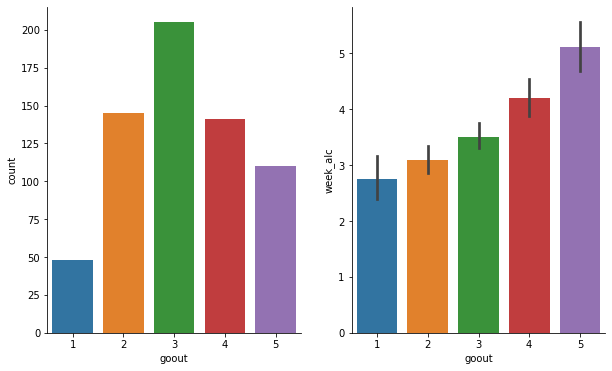

In [60]:
#Variable goout == Going out with friends --- 1 very low to 5 very high
print("Descriptive Statistics :", '\n', df['goout'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['goout'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['goout'].corr(df['alc']))
print("Going out with friends --- 1 very low to 5 very high")
print("Proportion of categories :", '\n', df.goout.value_counts())
print("percentage of data distrib :", '\n', df.goout.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="goout", data=df,  ax = ax[0])
sns.barplot(x="goout", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'goout').mean()

### Var 27: health 
**Student's current health status**
* 1 very bad to 5 very good

Descriptive Statistics : 
 count    649.000000
mean       3.536210
std        1.446259
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
Correlation with weekly alcohol consumption : 
 0.10154323733108915
Correlation with target alc consumption : 
 0.10890972160823516
Student current health status --- 1 very bad to 5 very good
Proportion of categories : 
 5    249
3    124
4    108
1     90
2     78
Name: health, dtype: int64
percentage of data distrib : 
 5    0.383667
3    0.191063
4    0.166410
1    0.138675
2    0.120185
Name: health, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,G1,G2,G3,week_alc,alc
health,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.600000,0.722222,16.666667,0.277778,0.711111,0.833333,2.566667,2.266667,3.433333,3.666667,2.333333,1.844444,1.622222,1.933333,0.200000,0.077778,0.611111,0.044444,0.477778,0.800000,0.900000,0.788889,0.411111,3.688889,3.111111,3.333333,1.466667,1.988889,4.222222,11.677778,11.988889,12.477778,3.455556,0.133333
2,0.589744,0.641026,16.730769,0.358974,0.705128,0.897436,2.576923,2.307692,3.000000,3.538462,2.294872,1.782051,1.602564,1.923077,0.217949,0.102564,0.589744,0.038462,0.538462,0.794872,0.884615,0.794872,0.346154,3.948718,3.102564,3.217949,1.384615,2.205128,3.435897,11.602564,11.820513,12.192308,3.589744,0.128205
3,0.669355,0.604839,16.862903,0.282258,0.693548,0.903226,2.419355,2.233871,3.169355,3.629032,2.459677,1.806452,1.540323,2.088710,0.185484,0.112903,0.596774,0.056452,0.411290,0.790323,0.887097,0.741935,0.379032,3.862903,3.024194,2.983871,1.451613,2.217742,3.766129,11.193548,11.491935,11.838710,3.669355,0.145161
4,0.675926,0.601852,16.851852,0.333333,0.712963,0.879630,2.379630,2.175926,3.250000,3.777778,2.379630,1.842593,1.694444,1.981481,0.203704,0.120370,0.629630,0.037037,0.509259,0.851852,0.861111,0.777778,0.324074,3.944444,3.166667,3.240741,1.518519,2.277778,3.240741,11.731481,11.888889,12.305556,3.796296,0.203704
5,0.670683,0.514056,16.670683,0.293173,0.702811,0.871486,2.582329,2.413655,3.285141,3.915663,2.518072,1.839357,1.497992,1.831325,0.257028,0.104418,0.622490,0.084337,0.497992,0.791165,0.911647,0.759036,0.373494,4.040161,3.313253,3.196787,1.570281,2.441767,3.654618,11.192771,11.240964,11.469880,4.012048,0.232932


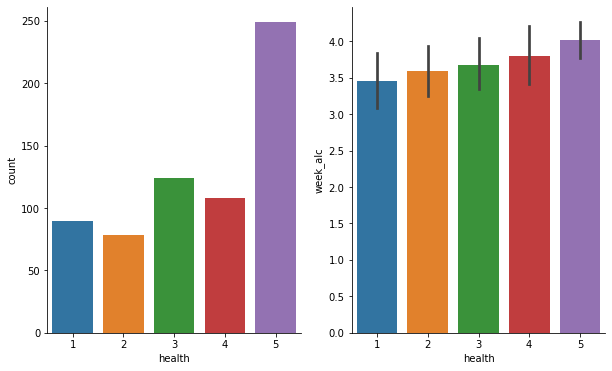

In [61]:
#Variable health == student current health status --- 1 very bad to 5 very good
print("Descriptive Statistics :", '\n', df['health'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['health'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['health'].corr(df['alc']))
print("Student current health status --- 1 very bad to 5 very good")
print("Proportion of categories :", '\n', df.health.value_counts())
print("percentage of data distrib :", '\n', df.health.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="health", data=df,  ax = ax[0])
sns.barplot(x="health", y = 'week_alc', data=df,  ax = ax[1])

df.groupby(by= 'health').mean()

### Var 28: absences 
**Student's absences from school**
* 0 to 93

Descriptive Statistics : 
 count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64
Correlation with weekly alcohol consumption : 
 0.18108448646431763
Correlation with target alc consumption : 
 0.14624299593479143
Number of school absences ----- 0 to 93
percentage of data distrib : 
 0     0.375963
2     0.169492
4     0.143297
6     0.075501
8     0.064715
10    0.032357
1     0.018490
5     0.018490
12    0.018490
16    0.015408
14    0.012327
3     0.010786
9     0.010786
11    0.007704
7     0.004622
18    0.004622
15    0.003082
21    0.003082
22    0.003082
30    0.001541
13    0.001541
24    0.001541
26    0.001541
32    0.001541
Name: absences, dtype: float64


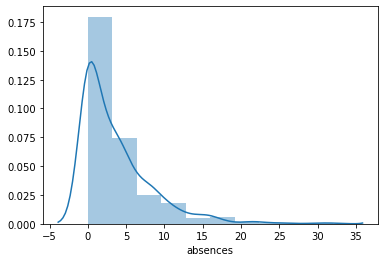

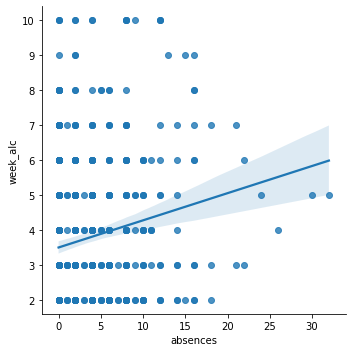

In [62]:
#Variable absences == Number of school absences ----- 0 to 93
print("Descriptive Statistics :", '\n', df['absences'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['absences'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['absences'].corr(df['alc']))
print("Number of school absences ----- 0 to 93")
print("percentage of data distrib :", '\n', df.absences.value_counts(normalize=True))

sns.despine(right=True)
sns.distplot(a=df["absences"],bins=10, kde=True, hist=True)
sns.lmplot(x="absences", y = 'week_alc', data=df)

### Var 29: G1 
**Student's first period grade**
* 0 to 20

Descriptive Statistics : 
 count    649.000000
mean      11.399076
std        2.745265
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.19093142749719894
Correlation with target alc consumption : 
 -0.19950873005733002
Student first period grade --- 0 to 20
Proportion of categories : 
 10    95
11    91
12    82
13    72
14    71
9     65
8     42
15    35
7     33
16    22
17    16
6      9
18     7
5      5
4      2
19     1
0      1
Name: G1, dtype: int64
percentage of data distrib : 
 10    0.146379
11    0.140216
12    0.126348
13    0.110940
14    0.109399
9     0.100154
8     0.064715
15    0.053929
7     0.050847
16    0.033898
17    0.024653
6     0.013867
18    0.010786
5     0.007704
4     0.003082
19    0.001541
0     0.001541
Name: G1, dtype: float64


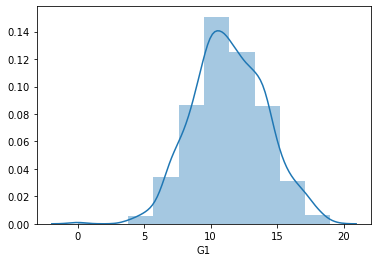

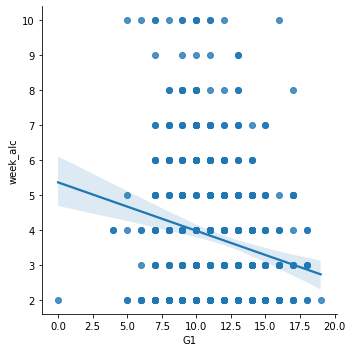

In [63]:
#Variable G1 == Student first period grade --- 0 to 20
print("Descriptive Statistics :", '\n', df['G1'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['G1'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['G1'].corr(df['alc']))
print("Student first period grade --- 0 to 20")
print("Proportion of categories :", '\n', df.G1.value_counts())
print("percentage of data distrib :", '\n', df.G1.value_counts(normalize=True))

sns.despine(right=True)
sns.distplot(a=df["G1"],bins=10, kde=True, hist=True)
sns.lmplot(x="G1", y = 'week_alc', data=df)

### Var 30: G2
**Student's second period grade**
* 0 to 20

Descriptive Statistics : 
 count    649.000000
mean      11.570108
std        2.913639
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.1942221803115007
Correlation with target alc consumption : 
 -0.19278349766703115
Student second period grade --- 0 to 20
Proportion of categories : 
 11    103
12     86
10     83
13     80
9      72
14     54
8      40
15     38
16     25
17     20
7      16
18     14
6       7
0       7
5       3
19      1
Name: G2, dtype: int64
percentage of data distrib : 
 11    0.158706
12    0.132512
10    0.127889
13    0.123267
9     0.110940
14    0.083205
8     0.061633
15    0.058552
16    0.038521
17    0.030817
7     0.024653
18    0.021572
6     0.010786
0     0.010786
5     0.004622
19    0.001541
Name: G2, dtype: float64


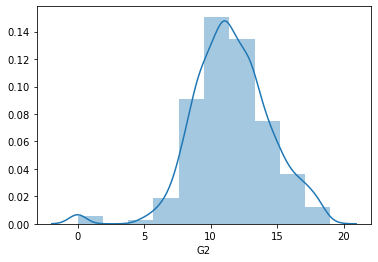

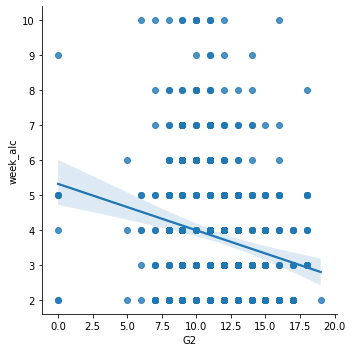

In [64]:
#Variable G1 == Student second period grade --- 0 to 20
print("Descriptive Statistics :", '\n', df['G2'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['G2'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['G2'].corr(df['alc']))
print("Student second period grade --- 0 to 20")
print("Proportion of categories :", '\n', df.G2.value_counts())
print("percentage of data distrib :", '\n', df.G2.value_counts(normalize=True))

sns.despine(right=True)
sns.distplot(a=df["G2"],bins=10, kde=True, hist=True)
sns.lmplot(x="G2", y = 'week_alc', data=df)

### Var 31: G3
**Student's third period grade**
* 0 to 20

Descriptive Statistics : 
 count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
Correlation with weekly alcohol consumption : 
 -0.2088812423447083
Correlation with target alc consumption : 
 -0.21112969606591758
Student first period grade --- 0 to 20
Proportion of categories : 
 11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
0      15
18     15
7      10
6       3
19      2
5       1
1       1
Name: G3, dtype: int64
percentage of data distrib : 
 11    0.160247
10    0.149461
13    0.126348
12    0.110940
14    0.097072
15    0.075501
16    0.055470
9     0.053929
8     0.053929
17    0.044684
0     0.023112
18    0.023112
7     0.015408
6     0.004622
19    0.003082
5     0.001541
1     0.001541
Name: G3, dtype: float64


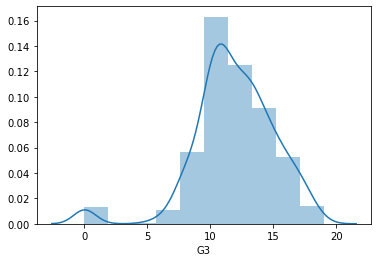

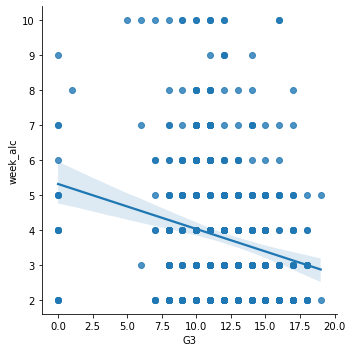

In [65]:
#Variable G1 == Student third period grade --- 0 to 20
print("Descriptive Statistics :", '\n', df['G3'].describe())
print("Correlation with weekly alcohol consumption :", '\n', df['G3'].corr(df['week_alc']))
print("Correlation with target alc consumption :", '\n', df['G3'].corr(df['alc']))
print("Student first period grade --- 0 to 20")
print("Proportion of categories :", '\n', df.G3.value_counts())
print("percentage of data distrib :", '\n', df.G3.value_counts(normalize=True))

sns.despine(right=True)
sns.distplot(a=df["G3"],bins=10, kde=True, hist=True)
sns.lmplot(x="G3", y = 'week_alc', data=df)

In [67]:
heavy = df.loc[df['alc'] == 1]
light = df.loc[df['alc'] == 0]
grades_heavy = df.grade_avg
grades_light = df.grade_avg

AttributeError: 'DataFrame' object has no attribute 'grade_avg'

In [ ]:
plt.hist([grades_heavy,grades_light], bins = 30, stacked = True)
plt.xlabel('grade point average')
plt.ylabel('frequency')
plt.title('heavy drinkers & light drinkers GPA distributions')
plt.axvline(x = 10.5, color = 'k')
plt.axvline(x = 12.33, color = 'k')
plt.savefig('images/gpahist.png')
plt.show()

### Var 32: week_alc
This variable was generated by transforming the `Dalc` and `Walc` variables. The `Dalc` variable denotes the level of alcohol consumption on a workday while the `Walc` variable denotes the level of alcohol consumption in the weekend. The sum of these two variables will tell us the level of alcohol consumption for a student for a week, combining workday + weekend. 
* 1 very low to 10 very high.

In [ ]:
#Variable week_alc == student total week alcohol consumption --- 1 very low to 10 very high
print("Descriptive Statistics :", '\n', df['week_alc'].describe())
print("Student total week alcohol consumption --- 1 very low to 10 very high")
print("Proportion of categories :", '\n', df.week_alc.value_counts())
print("percentage of data distrib :", '\n', df.week_alc.value_counts(normalize=True))

sns.catplot(x="week_alc", kind="count", palette="ch:.25", data=df)



### Var 33: alc
This variable was generated by condensing the `week_alc` variable which gives the total level of alcohol consumption in a week. For level ranging from 1 to 5 has been binned as low level of alcohol consumption and range from 6 to 10 in a week has been binned as high level of alcohol consumption. Our end goal is to model what factors affect high levels of alcohol consumption in highschool students. Knowing the specific level does not give us any more information than the student having a high level of alcohol consumption.
* 0 very low
* 1 very high.

In [ ]:
# Target Variable == Student Acohol Consumption Status --- 
print("Descriptive Statistics :", '\n', df['alc'].describe())
print("# of Students who have high level of alcohol consumption (1) :", df['alc'].sum())
print("# of Students who have low level of alcohol consumption(0) :", df['alc'].count() - df['alc'].sum())
print("percentage of data distrib :", '\n', df.alc.value_counts(normalize=True))

sns.catplot(x="alc", kind="count", palette="ch:.25", data=df)
